# 2/11 Descriptive Stats

Many newsrooms are interested in the RFV metric, which gives them better insight into how people are engaging with the content on their site.

We’re developing an analytics system that gives newsrooms Aaron has developed an algorithm that calculates RFV from the data in Google Analytics.

For next week, please set up a Jupyter notebook that you would use to describe the key statistics making up RFV:
user_ltv, user_ltv.revenue_in_usd, user_ltv.sessions, user_ltv.engagement_time_millis, user_ltv.purchases,
user_ltv.engaged_sessions, user_ltv.session_duration_micros


Shared file: https://docs.google.com/document/d/1pkEA7Yh9gcDb0CkMT0ntxW2sg0uCbfAk5tBPDJm1M6Y/edit?tab=t.0

## Import data

Data dictionary: https://support.google.com/analytics/answer/12769371?hl=en&ref_topic=9359001&sjid=8531645469595224334-NA


In [ ]:
import json
import pandas as pd
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
shared_folder_path = '/content/drive/My Drive/LNL projects/RFV metric data/dfp_GA4_daily_user_exports'

# List files to check the files inside the folder
json_files = os.listdir(shared_folder_path)

In [ ]:
print(f"{shared_folder_path}/{json_files[0]}") #path for each one
#this json means july 29th, 2024

/content/drive/My Drive/LNL projects/RFV metric data/dfp_GA4_daily_user_exports/20240729.json


In [ ]:
#Example for just the first json file in the list
file_path = f"{shared_folder_path}/{json_files[0]}"

with open(file_path, "r") as file:
    data = [json.loads(line) for line in file]

print(data)

[{'pseudo_user_id': '918521256.1722311194', 'stream_id': '6228347800', 'user_info': {'last_active_timestamp_micros': 1722311201000272, 'user_first_touch_timestamp_micros': 1722211200000000, 'first_purchase_date': None}, 'device': {'operating_system': 'web', 'category': 'mobile', 'mobile_brand_name': None, 'mobile_model_name': None, 'unified_screen_name': 'Michelle Aslam, Author at Dallas Free Press'}, 'geo': {'city': 'Richardson', 'country': 'United States', 'continent': 'Americas', 'region': 'Texas'}, 'audiences': [{'id': 6228365118, 'name': 'All Users', 'membership_start_timestamp_micros': 1722311194000000, 'membership_expiry_timestamp_micros': 1768967201000000, 'npa': False}], 'user_properties': [], 'user_ltv': {'revenue_in_usd': None, 'sessions': 1, 'engagement_time_millis': 5542, 'purchases': None, 'engaged_sessions': None, 'session_duration_micros': 6747049}, 'predictions': {'in_app_purchase_score_7d': None, 'purchase_score_7d': None, 'churn_score_7d': None, 'revenue_28d_in_usd':

In [ ]:
len(data[0]), type(data[0])

(12, dict)

In [ ]:
(data[0]).keys()

dict_keys(['pseudo_user_id', 'stream_id', 'user_info', 'device', 'geo', 'audiences', 'user_properties', 'user_ltv', 'predictions', 'privacy_info', 'occurrence_date', 'last_updated_date'])

In [ ]:
tmp_dict = dict.fromkeys(list((data[0]).keys()),)

In [ ]:
data[0]['device']

{'operating_system': 'web',
 'category': 'mobile',
 'mobile_brand_name': None,
 'mobile_model_name': None,
 'unified_screen_name': 'Michelle Aslam, Author at Dallas Free Press'}

Create a data frame with all of the json files. ```occurence_date``` and/or ```last_updated_date``` represents the date for when the the data was pulled.

In [ ]:
tem = []

for n in range(len(json_files)):
  file_path = f"{shared_folder_path}/{json_files[n]}"
  with open(file_path, "r") as file:
    data = [json.loads(line) for line in file]
  for i in range(len(data)):
    tem_dict={}
    tem_dict = {
        'pseudo_user_id': data[i]['pseudo_user_id'],
        'stream_id': data[i]['stream_id'],
        'user_last_active_timestamp_micros': data[i]['user_info']['last_active_timestamp_micros'],
        'user_first_touch_timestamp_micros': data[i]['user_info']['user_first_touch_timestamp_micros'],
        'user_first_purchase_date': data[i]['user_info']['first_purchase_date'],
        'device_category': data[i]['device']['category'],
        'city': data[i]['geo']['city'],
        'region': data[i]['geo']['region'],
        'country': data[i]['geo']['country'],
        'continent': data[i]['geo']['continent'],
        'operating_system': data[i]['device']['operating_system'],
        'category': data[i]['device']['category'],
        'mobile_brand_name': data[i]['device']['mobile_brand_name'],
        'mobile_model_name': data[i]['device']['mobile_model_name'],
        'unified_screen_name': data[i]['device']['unified_screen_name'],
        'user_ltv_revenue_in_usd': data[i]['user_ltv']['revenue_in_usd'],
        'user_ltv_sessions' : data[i]['user_ltv']['sessions'],
        'user_ltv_engagement_time_millis' : data[i]['user_ltv']['engagement_time_millis'],
        'user_ltv_purchases' : data[i]['user_ltv']['purchases'],
        'user_ltv_engaged_sessions' : data[i]['user_ltv']['engaged_sessions'],
        'user_ltv_session_duration_micros' : data[i]['user_ltv']['session_duration_micros'],
        'occurrence_date': data[i]['occurrence_date'],
        'last_updated_date': data[i]['last_updated_date']
        }
    tem.append(tem_dict)

  df = pd.DataFrame(tem)

In [ ]:
df

,pseudo_user_id,stream_id,user_last_active_timestamp_micros,user_first_touch_timestamp_micros,user_first_purchase_date,device_category,city,region,country,continent,...,mobile_model_name,unified_screen_name,user_ltv_revenue_in_usd,user_ltv_sessions,user_ltv_engagement_time_millis,user_ltv_purchases,user_ltv_engaged_sessions,user_ltv_session_duration_micros,occurrence_date,last_updated_date
0,918521256.1722311194,6228347800,1722311201000272,1722211200000000,None,mobile,Richardson,Texas,United States,Americas,...,None,"Michelle Aslam, Author at Dallas Free Press",NaN,1.0,5542.0,None,NaN,6.747049e+06,20240729,20240729
1,1837375091.1722291996,6228347800,1722292062004077,1722211200000000,None,mobile,Dallas,Texas,United States,Americas,...,None,Then and now: What’s happening with the West D...,NaN,1.0,65206.0,None,1.0,6.604779e+07,20240729,20240729
2,359909987.1722295107,6228347800,1722295138148488,1722211200000000,None,mobile,,Texas,United States,Americas,...,None,Pointe South Revitalization Committee Invites ...,NaN,1.0,26600.0,None,1.0,2.863520e+07,20240729,20240729
3,1632424271.1722283367,6228347800,1722283366610951,1722211200000000,None,mobile,Dallas,Texas,United States,Americas,...,None,Activist Ernest McMillan retraces Dallas' Civi...,NaN,1.0,NaN,None,NaN,NaN,20240729,20240729
4,516021927.1722287029,6228347800,1722287061304784,1722211200000000,None,mobile,New York,New York,United States,Americas,...,None,Pinkston seniors return to campus to prep for ...,NaN,1.0,11884.0,None,1.0,3.122116e+07,20240729,20240729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4431,1638198668.1722107367,6228347800,1722139579679803,1722038400000000,None,mobile,Dallas,Texas,United States,Americas,...,None,"Una cancha de fútbol en la comunidad, pero no ...",NaN,2.0,29724.0,None,2.0,8.707703e+07,20240728,20240728
4432,1803586204.1722181407,6228347800,1722185156833917,1722124800000000,None,mobile,Dallas,Texas,United States,Americas,...,None,New ‘West Dallas Junior High’ sign at the entr...,NaN,2.0,8416.0,None,2.0,4.111993e+07,20240728,20240728
4433,699991592.1722205607,6228347800,1722210401262219,1722124800000000,None,desktop,Paris,Texas,United States,Americas,...,None,New ‘West Dallas Junior High’ sign at the entr...,NaN,2.0,766637.0,None,2.0,9.131033e+08,20240728,20240728
4434,971517147.1722103222,6228347800,1722205338159911,1722038400000000,None,mobile,Arlington,Texas,United States,Americas,...,None,A parking lot symbolizes the State Fair of Tex...,NaN,5.0,249711.0,None,5.0,4.551663e+09,20240728,20240728


In [ ]:
sum(df['last_updated_date'] == df['occurrence_date']) == df.shape[0]

True

```last_updated_date``` and ```occurence_date``` are confirmed to be the same value

In [ ]:
df['last_updated_date'].unique()

array(['20240729', '20240727', '20240722', '20240710', '20240720',
       '20240714', '20240724', '20240726', '20240718', '20240630',
       '20240801', '20240713', '20240805', '20240707', '20240804',
       '20240708', '20240701', '20240628', '20240802', '20240719',
       '20240717', '20240629', '20240704', '20240702', '20240706',
       '20240806', '20240731', '20240705', '20240627', '20240625',
       '20240703', '20240721', '20240626', '20240723', '20240803',
       '20240807', '20240715', '20240725', '20240716', '20240730',
       '20240709', '20240712', '20240711', '20240728'], dtype=object)

Looking at the unique values for ```last_updated_date```, we confirmed all of the json files were accounted for.



In [ ]:
df['last_updated_date'] = pd.to_datetime(df['last_updated_date'])
df['occurrence_date'] = pd.to_datetime(df['occurrence_date'])

In [ ]:
df['user_first_purchase_date'].unique()

array([None], dtype=object)

Since ```user_first_purcahse_date``` only has one value for all entries (None), then we can drop that column.



In [ ]:
df.drop('user_first_purchase_date', axis=1, inplace=True)

In [ ]:
df.dtypes

,0
pseudo_user_id,object
stream_id,object
user_last_active_timestamp_micros,int64
user_first_touch_timestamp_micros,int64
device_category,object
city,object
region,object
country,object
continent,object
operating_system,object


## Check missing values in data

In [ ]:
#Check the number and percentage of missing values for each column
missing_data = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': df.isnull().sum() / len(df) * 100
})

missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False).reset_index()
missing_data

,index,Missing Count,Missing Percentage
0,user_ltv_purchases,4436,100.000000
1,mobile_model_name,4436,100.000000
2,user_ltv_revenue_in_usd,4325,97.497746
3,user_ltv_engaged_sessions,1094,24.661858
4,user_ltv_engagement_time_millis,744,16.771867
5,user_ltv_session_duration_micros,488,11.000902
6,unified_screen_name,78,1.758341
7,mobile_brand_name,65,1.465284
8,user_ltv_sessions,47,1.059513
9,device_category,0,0.000000


In [ ]:
# Check for missing data patterns
missing_count_per_row = df.isnull().sum(axis=1)
summary = missing_count_per_row.value_counts().reset_index()
summary.columns = ["Missing Count Per Row", "Number of Rows"]
summary = summary.sort_values("Missing Count Per Row")
summary

,Missing Count Per Row,Number of Rows
4,2,104
0,3,3012
1,4,627
3,5,203
2,6,484
5,7,6


In [ ]:
df.describe()

,user_last_active_timestamp_micros,user_first_touch_timestamp_micros,user_ltv_revenue_in_usd,user_ltv_sessions,user_ltv_engagement_time_millis,user_ltv_engaged_sessions,user_ltv_session_duration_micros,occurrence_date,last_updated_date
count,4.436000e+03,4.436000e+03,111.0,4389.000000,3.692000e+03,3342.000000,3.948000e+03,4436,4436
mean,1.721378e+15,1.699689e+15,0.0,5.195261,4.842450e+05,4.821364,3.011492e+09,2024-07-18 14:11:08.710550016,2024-07-18 14:11:08.710550016
min,1.719291e+15,0.000000e+00,0.0,1.000000,1.100000e+01,1.000000,6.800000e+01,2024-06-25 00:00:00,2024-06-25 00:00:00
25%,1.720409e+15,1.720051e+15,0.0,1.000000,1.185275e+04,1.000000,1.424236e+07,2024-07-07 00:00:00,2024-07-07 00:00:00
50%,1.721527e+15,1.721347e+15,0.0,1.000000,3.637700e+04,1.000000,5.076786e+07,2024-07-20 00:00:00,2024-07-20 00:00:00
75%,1.722367e+15,1.722211e+15,0.0,1.000000,1.136545e+05,1.000000,2.192868e+08,2024-07-30 00:00:00,2024-07-30 00:00:00
max,1.723089e+15,1.722989e+15,0.0,412.000000,4.797453e+07,315.000000,3.866025e+11,2024-08-07 00:00:00,2024-08-07 00:00:00
std,1.136897e+12,1.887349e+14,0.0,31.728522,3.162672e+06,25.876161,2.488932e+10,NaN,NaN


## Plot distribution for variables

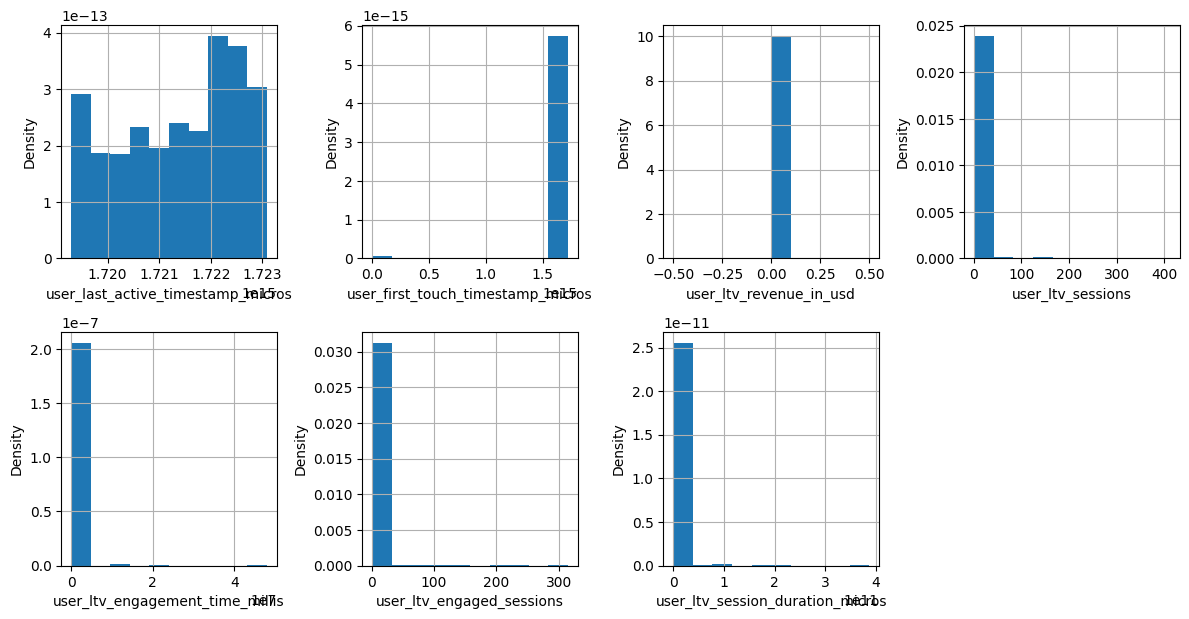

In [ ]:
# Plot the distribution for variables
import matplotlib.pyplot as plt
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 12))
for i, column in enumerate(df[continuous_columns], 1):
    plt.subplot(4, 4, i)
    df[column].dropna().hist(bins=10, density=True)
    plt.xlabel(column)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

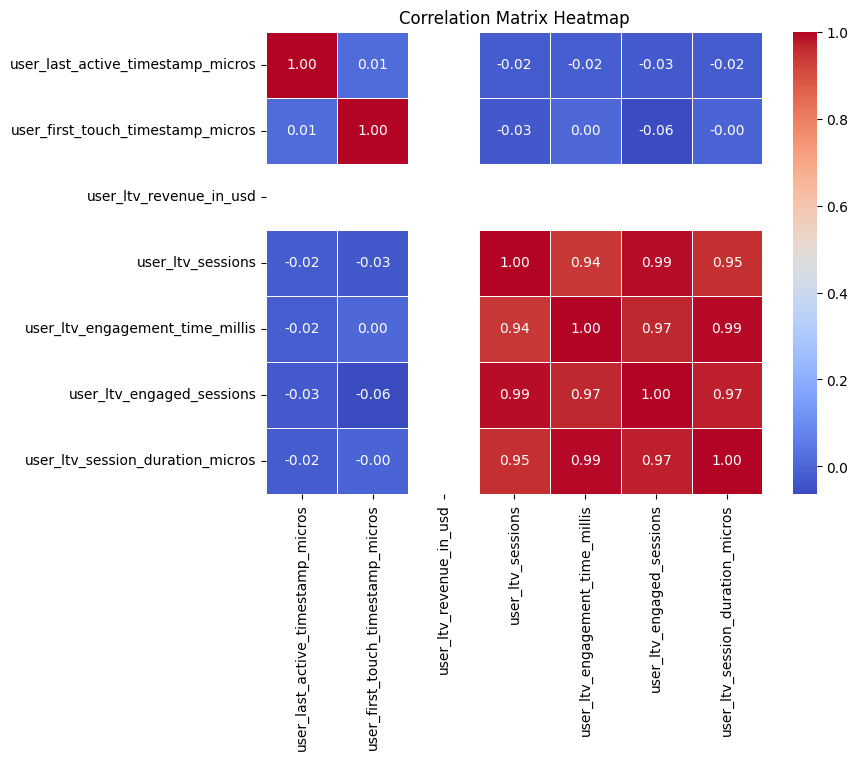

In [ ]:
# Correlation matrix for variables
import seaborn as sns
corr_matrix = df[continuous_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True,fmt=".2f",cmap="coolwarm", linewidths=0.5, cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

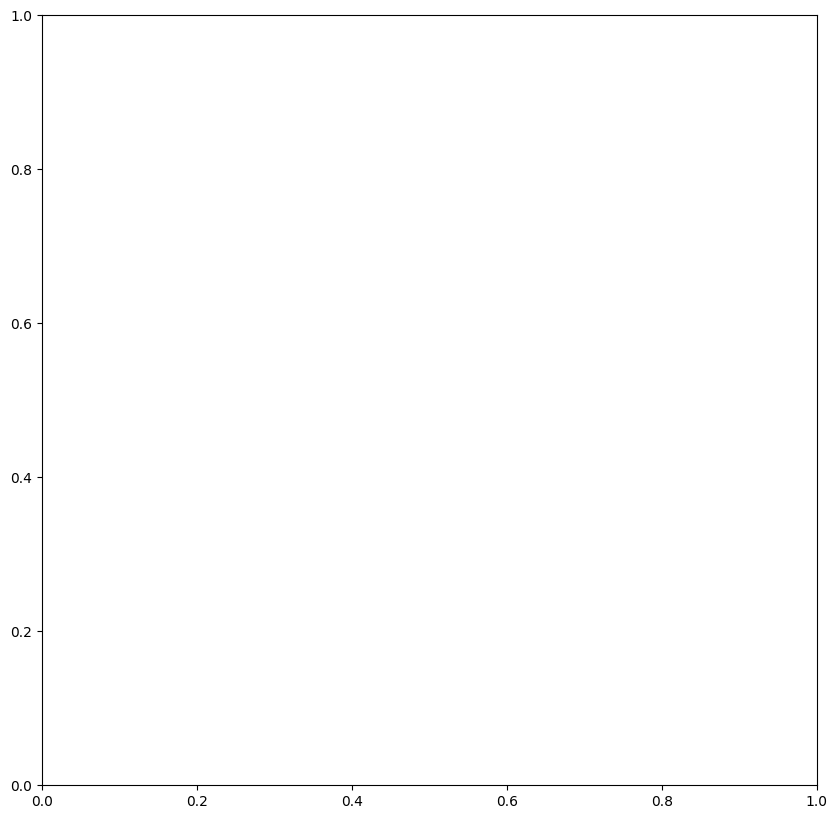

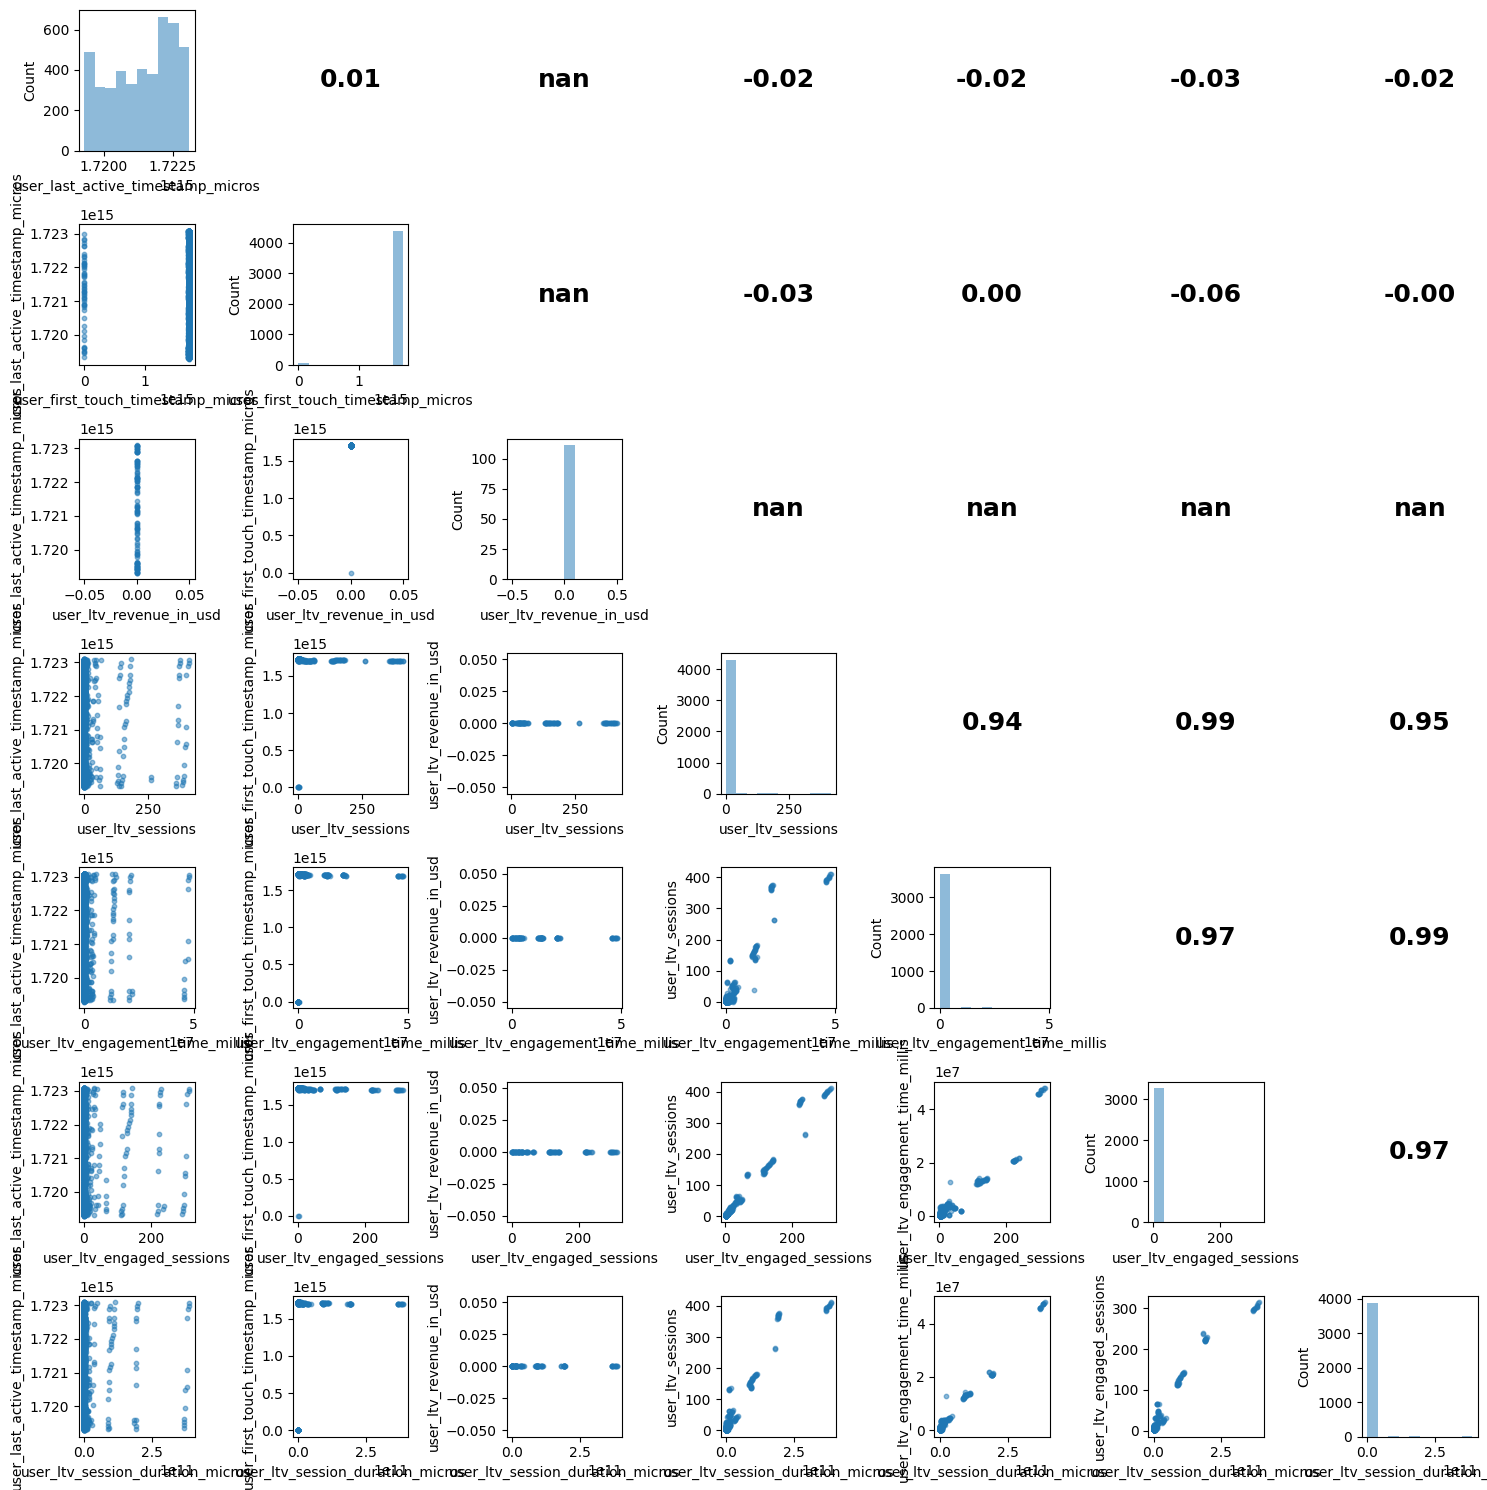

In [ ]:
from mlxtend.plotting import scatterplotmatrix
fig, axes = plt.subplots(figsize=(10, 10))
scatterplotmatrix(df[continuous_columns].values, figsize=(15, 15), alpha=0.5, marker='o', s=10, names=df[continuous_columns].columns)
num_vars = len(df[continuous_columns].columns)
for i in range(num_vars):
    for j in range(i + 1, num_vars):
        ax = plt.gcf().axes[i * num_vars + j]
        ax.annotate(f'{corr_matrix.iloc[i, j]:.2f}', (0.5, 0.5),
                    xycoords='axes fraction', ha='center', va='center',
                    fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

## Aggregate data

All users with activity for the current day, based on a change in one of the user's attributes, was exported. For example, if a user initiates a session and thus increments the lifetime value of user_ltv.sessions, then that user is included in the export. If a user is dropped from an audience because on this day they no longer match the include condition for the audience (e.g., they haven't made a purchase for the last 7 days), then that user's data has changed and they are included in the export.

Because users are included based on changes in data and not only on activity, the number of users in the export may exceed the value of the Active users metric for a given day or date range. (The Active users metric appears as Users in Reports.)


The ```pseudo_user_id``` field is the pseudonymous identifier. Data for a user is updated when there is a change to one of the fields.

In [ ]:
sum(df['pseudo_user_id'].value_counts() >1), len(df), len(df) - sum(df['pseudo_user_id'].value_counts() >1)

(290, 4436, 4146)

In [ ]:
#example of a user who has visited more than once over the 44 days
df[df['pseudo_user_id'] =='1526324155.1662589792']

,pseudo_user_id,stream_id,user_last_active_timestamp_micros,user_first_touch_timestamp_micros,device_category,city,region,country,continent,operating_system,...,mobile_model_name,unified_screen_name,user_ltv_revenue_in_usd,user_ltv_sessions,user_ltv_engagement_time_millis,user_ltv_purchases,user_ltv_engaged_sessions,user_ltv_session_duration_micros,occurrence_date,last_updated_date
1451,1526324155.1662589792,6228347800,1722896874373902,1696291200000000,desktop,Garland,Texas,United States,Americas,web,...,None,Art for Veterans - Dallas Free Press,0.0,405.0,47342710.0,None,309.0,3.822596e+11,2024-08-05,2024-08-05
1582,1526324155.1662589792,6228347800,1720483922083351,1696291200000000,desktop,Garland,Texas,United States,Americas,web,...,None,Public Meeting: Malcolm X Boulevard Transporta...,0.0,396.0,46009757.0,None,301.0,3.723383e+11,2024-07-08,2024-07-08
1825,1526324155.1662589792,6228347800,1719619638742177,1696291200000000,desktop,Dallas,Texas,United States,Americas,web,...,None,West Dallas neighborhood resources - Dallas Fr...,0.0,392.0,45711732.0,None,298.0,3.689079e+11,2024-06-28,2024-06-28
1968,1526324155.1662589792,6228347800,1722625010657641,1696291200000000,desktop,Dallas,Texas,United States,Americas,web,...,None,"Michaela Rush, Author at Dallas Free Press",0.0,401.0,47246349.0,None,305.0,3.796032e+11,2024-08-02,2024-08-02
2326,1526324155.1662589792,6228347800,1719955151383719,1696291200000000,desktop,Garland,Texas,United States,Americas,web,...,None,Community First Look Series: Dallas Environmen...,0.0,393.0,45744131.0,None,299.0,3.689404e+11,2024-07-02,2024-07-02
2518,1526324155.1662589792,6228347800,1722987700841949,1696291200000000,desktop,Dallas,Texas,United States,Americas,web,...,None,Dallas Free Press amplifies voices in South an...,0.0,410.0,47790371.0,None,313.0,3.859125e+11,2024-08-06,2024-08-06
2875,1526324155.1662589792,6228347800,1719519520115456,1696291200000000,desktop,Dallas,Texas,United States,Americas,web,...,None,Dallas Free Press Text and Email Notifications,0.0,388.0,45643562.0,None,296.0,3.677110e+11,2024-06-27,2024-06-27
2995,1526324155.1662589792,6228347800,1719356898551546,1696291200000000,desktop,Dallas,Texas,United States,Americas,web,...,None,West Dallas Events - Dallas Free Press,0.0,385.0,45581029.0,None,294.0,3.675765e+11,2024-06-25,2024-06-25
3197,1526324155.1662589792,6228347800,1719432369258192,1696291200000000,desktop,Garland,Texas,United States,Americas,web,...,None,La Bajada Archives - Dallas Free Press,0.0,386.0,45638452.0,None,295.0,3.677035e+11,2024-06-26,2024-06-26
3479,1526324155.1662589792,6228347800,1723062203939665,1696291200000000,desktop,Garland,Texas,United States,Americas,web,...,None,Dallas Free Press amplifies voices in South an...,0.0,412.0,47974526.0,None,315.0,3.866025e+11,2024-08-07,2024-08-07


Out of the total rows in our dataframe, there are 4,146 unique ```pseudo_user_ids``` out of a total of 4,436 rows. Which leaves us with 290 users who had a change in attributes more than once over the period of time. We need to use only the most recent data for these 290 users since the data is added onto from the last time the user used the site.

Let's create a new database of just the ID's that have more than 1 entry and another database with ID's that have only 1 entry.

In [ ]:
df_dup_ids = df[df['pseudo_user_id'].duplicated(keep=False)]
df_dup_ids = df_dup_ids.sort_values(by='occurrence_date',ascending=False)
df_dup_ids.reset_index(drop=True,inplace=True)

In [ ]:
df_unique_ids = df[~df['pseudo_user_id'].duplicated(keep=False)]
df_unique_ids = df_unique_ids.sort_values(by='occurrence_date',ascending=False)
df_unique_ids.reset_index(drop=True,inplace=True)

In [ ]:
#Create a new database with only the latest occurence. The df_dup_ids is already sorted from latest to earliest
df_dup_ids_latest = df_dup_ids.drop_duplicates(subset='pseudo_user_id',keep='first')
df_dup_ids_latest.reset_index(inplace=True,drop=True)
df_dup_ids_latest

,pseudo_user_id,stream_id,user_last_active_timestamp_micros,user_first_touch_timestamp_micros,device_category,city,region,country,continent,operating_system,...,mobile_model_name,unified_screen_name,user_ltv_revenue_in_usd,user_ltv_sessions,user_ltv_engagement_time_millis,user_ltv_purchases,user_ltv_engaged_sessions,user_ltv_session_duration_micros,occurrence_date,last_updated_date
0,1526324155.1662589792,6228347800,1723062203939665,1696291200000000,desktop,Garland,Texas,United States,Americas,web,...,None,Dallas Free Press amplifies voices in South an...,0.0,412.0,47974526.0,None,315.0,3.866025e+11,2024-08-07,2024-08-07
1,1310700488.1721419653,6228347800,1723064420287101,1721347200000000,desktop,Wylie,Texas,United States,Americas,web,...,None,"A town, a cemetery and a school: Dallas’ histo...",NaN,4.0,233113.0,None,2.0,4.058210e+08,2024-08-07,2024-08-07
2,736877407.1722895878,6228347800,1723064419699441,1722816000000000,desktop,Idaho Falls,Idaho,United States,Americas,web,...,None,Brenda Hernandez,NaN,2.0,274957.0,None,1.0,2.725856e+09,2024-08-07,2024-08-07
3,983623725.1722450075,6228347800,1723081371109241,1722384000000000,mobile,Fort Worth,Texas,United States,Americas,web,...,None,dallas journalism and content,NaN,6.0,190130.0,None,3.0,1.841205e+09,2024-08-07,2024-08-07
4,1714044964.1722964269,6228347800,1723057240319000,1722902400000000,mobile,Wellston,Oklahoma,United States,Americas,web,...,None,West Dallas - Dallas Free Press,NaN,4.0,308768.0,None,4.0,6.913431e+08,2024-08-07,2024-08-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,1816934181.1717012300,6228347800,1719461110464432,1716940800000000,mobile,Bend,Oregon,United States,Americas,web,...,None,Dallas Free Press amplifies voices in South an...,NaN,4.0,21005.0,None,1.0,3.201273e+07,2024-06-27,2024-06-27
286,1285404467.1719330122,6228347800,1719408069121908,1719273600000000,desktop,Savage,Maryland,United States,Americas,web,...,None,What's a 'news desert'? - Dallas Free Press,NaN,2.0,212391.0,None,2.0,1.508086e+09,2024-06-26,2024-06-26
287,1035250476.1719361181,6228347800,1719403435686125,1719273600000000,mobile,Dallas,Texas,United States,Americas,web,...,None,West Dallas Events - Dallas Free Press,NaN,2.0,15509.0,None,1.0,2.653897e+07,2024-06-26,2024-06-26
288,1617339590.1719252107,6228347800,1719437009041476,1719187200000000,mobile,Fort Worth,Texas,United States,Americas,web,...,None,"Keri Mitchell, Author at Dallas Free Press",NaN,3.0,464799.0,None,3.0,1.708651e+09,2024-06-26,2024-06-26


In [ ]:
#Need to combine the 2 databases so it contains 1 entry for every ID using their latest activity
df_latest = pd.concat([df_dup_ids_latest, df_unique_ids], ignore_index=True)
df_latest

,pseudo_user_id,stream_id,user_last_active_timestamp_micros,user_first_touch_timestamp_micros,device_category,city,region,country,continent,operating_system,...,mobile_model_name,unified_screen_name,user_ltv_revenue_in_usd,user_ltv_sessions,user_ltv_engagement_time_millis,user_ltv_purchases,user_ltv_engaged_sessions,user_ltv_session_duration_micros,occurrence_date,last_updated_date
0,1526324155.1662589792,6228347800,1723062203939665,1696291200000000,desktop,Garland,Texas,United States,Americas,web,...,None,Dallas Free Press amplifies voices in South an...,0.0,412.0,47974526.0,None,315.0,3.866025e+11,2024-08-07,2024-08-07
1,1310700488.1721419653,6228347800,1723064420287101,1721347200000000,desktop,Wylie,Texas,United States,Americas,web,...,None,"A town, a cemetery and a school: Dallas’ histo...",NaN,4.0,233113.0,None,2.0,4.058210e+08,2024-08-07,2024-08-07
2,736877407.1722895878,6228347800,1723064419699441,1722816000000000,desktop,Idaho Falls,Idaho,United States,Americas,web,...,None,Brenda Hernandez,NaN,2.0,274957.0,None,1.0,2.725856e+09,2024-08-07,2024-08-07
3,983623725.1722450075,6228347800,1723081371109241,1722384000000000,mobile,Fort Worth,Texas,United States,Americas,web,...,None,dallas journalism and content,NaN,6.0,190130.0,None,3.0,1.841205e+09,2024-08-07,2024-08-07
4,1714044964.1722964269,6228347800,1723057240319000,1722902400000000,mobile,Wellston,Oklahoma,United States,Americas,web,...,None,West Dallas - Dallas Free Press,NaN,4.0,308768.0,None,4.0,6.913431e+08,2024-08-07,2024-08-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,397846486.1719356858,6228347800,1719357077467482,1719273600000000,desktop,Chicago,Illinois,United States,Americas,web,...,None,Dallas Free Press amplifies voices in South an...,NaN,1.0,107552.0,None,1.0,2.195260e+08,2024-06-25,2024-06-25
3953,532277247.1719357140,6228347800,1719357150898890,1719273600000000,desktop,Chicago,Illinois,United States,Americas,web,...,None,Dallas Free Press amplifies voices in South an...,NaN,1.0,10533.0,None,1.0,1.057223e+07,2024-06-25,2024-06-25
3954,1553161454.1719343775,6228347800,1719343855685626,1719273600000000,mobile,Phoenix,Arizona,United States,Americas,web,...,None,New Malcolm X Plaza hopes to provide a solutio...,NaN,1.0,2986.0,None,1.0,8.034453e+07,2024-06-25,2024-06-25
3955,1298974566.1719357777,6228347800,1719358822292223,1719273600000000,mobile,Mayville,North Dakota,United States,Americas,web,...,None,dallas journalism and content,NaN,1.0,83373.0,None,1.0,1.045517e+09,2024-06-25,2024-06-25


In [ ]:
sum(df_latest.value_counts('pseudo_user_id')>1) #check if any more duplicates and all set

0

## Describe Key Statistics

Below are the key statistics for the user's lifetime fields. Note that a session is a group of user interactions with your website or app that take place within a given time frame. In Analytics, a session initiates when a user either opens your app in the foreground or views a page or screen and no session is currently active. Also note that an engaged session is a session that lasts longer than 2 seconds.

### user_ltv.revenue_in_usd

This field represents the purcahse amount (in USD) for that event and it's only populated for a purchase event only.

In [ ]:
df_latest.describe()['user_ltv_revenue_in_usd'], f"Unique: {df_latest['user_ltv_revenue_in_usd'].unique()}"

(count    29.0
 mean      0.0
 min       0.0
 25%       0.0
 50%       0.0
 75%       0.0
 max       0.0
 std       0.0
 Name: user_ltv_revenue_in_usd, dtype: float64,
 'Unique: [ 0. nan]')

In [ ]:
print(f"""
NaN values: {len(df_latest) - sum(df_latest['user_ltv_revenue_in_usd'] == 0)}
Zero values: {sum(df_latest['user_ltv_revenue_in_usd'] == 0)}
Percentage with zero: {sum(df_latest['user_ltv_revenue_in_usd'] == 0)/len(df):.2%}
    """)


NaN values: 3928
Zero values: 29
Percentage with zero: 0.65%
    


Since there are 29 lifetime revenue values with 0, this means there has been an option to purchase and the users never have. The 3,928 entries with a missing value for revenue means they never had the option to purcahse something or the purcahse data is not avaliable due to privacy settings.

### user_ltv.sessions

This field represents lifetime total number of sessions for a user.

In [ ]:
df_latest.describe()['user_ltv_sessions'], f"Number with max: {sum(df_latest['user_ltv_sessions'] ==412)}"

(count    3919.000000
 mean        1.801990
 min         1.000000
 25%         1.000000
 50%         1.000000
 75%         1.000000
 max       412.000000
 std        11.017462
 Name: user_ltv_sessions, dtype: float64,
 'Number with max: 1')

The maximum number of a user's lifetime session is 412 with an average of 1. This number means the amount of times a user has had an interaction with the site. The standard deviation is reletively high, and this is due to having a maximum value of 412.

In [ ]:
df_dup_ids_latest.describe()['user_ltv_sessions'], sum(df_dup_ids_latest['user_ltv_sessions'] !=1)

(count    281.000000
 mean      10.088968
 min        1.000000
 25%        2.000000
 50%        3.000000
 75%        4.000000
 max      412.000000
 std       40.054284
 Name: user_ltv_sessions, dtype: float64,
 288)

However, if we only look at the users who visited the site more than once over the 44 day time span, the average user had about 10 total sessions over the span of the 44 days and every day before that.

### user_ltv.engagement_time_millis

This fields represent the lifetime total engagement time (in milliseconds).

In [ ]:
df_latest.describe()['user_ltv_engagement_time_millis']

,user_ltv_engagement_time_millis
count,3.232000e+03
mean,1.511797e+05
min,1.100000e+01
25%,1.130075e+04
50%,3.161250e+04
75%,9.287725e+04
max,4.797453e+07
std,1.118213e+06


In [ ]:
import numpy as np
print(
    f'''
Max: {max(df_latest['user_ltv_engagement_time_millis']) /1000} seconds or {max(df_latest['user_ltv_engagement_time_millis']) /60000:.2f} minutes
Min: {min(df_latest['user_ltv_engagement_time_millis']) /1000} seconds or {min(df_latest['user_ltv_engagement_time_millis']) /60000:.2f} minutes
Average: {np.mean(df_latest['user_ltv_engagement_time_millis']) /1000:.2f} seconds or {np.mean(df_latest['user_ltv_engagement_time_millis']) /60000:.2f} minutes
    ''')


Max: 47974.526 seconds or 799.58 minutes
Min: 0.011 seconds or 0.00 minutes
Average: 151.18 seconds or 2.52 minutes
    


The maximum engagement time is 799.58 minutes, which means a user has had a total amount of engaged sessions for 799.58 minutes. The avergae total engagement time is 2.53 minutes as of 8/7/24 for all users who have interacted with the site.

### user_ltv.purchases

This field represents lifetime total number of purchases.

In [ ]:
df_latest['user_ltv_purchases'].unique()

array([None], dtype=object)

All lifetime purchases value has a missing value. This means no user has every purchases something through this website or this metric is not enabled to collect data on.

This could also mean that there is no data available for the average revenue generated by new users over their first 120 days.

### user_ltv.engaged_sessions

This field represents lifetime total number of engaged sessions. Note that this field is different than sessions.This field goes a step farther and definitions an engaged sessions a session that lasts longer than 10 seconds or has at least 2 pageviews or screensviews.

In [ ]:
df_latest.describe()['user_ltv_engaged_sessions'], f"Number with max: {sum(df_latest['user_ltv_engaged_sessions'] ==315)}"

(count    2906.000000
 mean        1.679284
 min         1.000000
 25%         1.000000
 50%         1.000000
 75%         1.000000
 max       315.000000
 std         9.394419
 Name: user_ltv_engaged_sessions, dtype: float64,
 'Number with max: 1')

The maximum number of a user's lifetime engaged session is 315 with an average of 1.68. This number means the amount of times a user has had an engaged session with the site. So the user with the maximum number has been on the site for longer than 10 seconds or had at least 2 pageviews 315 times as of 8/7/24.

In [ ]:
df_dup_ids_latest.describe()['user_ltv_engaged_sessions'], sum(df_dup_ids_latest['user_ltv_engaged_sessions'] !=1)

(count    263.000000
 mean       7.422053
 min        1.000000
 25%        1.000000
 50%        2.000000
 75%        3.000000
 max      315.000000
 std       30.505672
 Name: user_ltv_engaged_sessions, dtype: float64,
 199)

However, if we only look at the users who visited the site more than once over the 44 day time span, the average user had about 7.42 total engaged sessions over the span of the 44 days and every day before that.



### user_ltv.session_duration_micros

Description from Google Analytics: This field represents the lifetime total session duration (in milliseconds).

We think this field is actually in micro seconds rather than milliseconds since the numbers are so high. So update field value to milliseconds and change name.

In [ ]:
df_latest['user_ltv_session_duration_millis'] = df_latest['user_ltv_session_duration_micros'] /1000

In [ ]:
df_latest.describe()['user_ltv_session_duration_millis']

,user_ltv_session_duration_millis
count,3.481000e+03
mean,5.682773e+05
min,6.800000e-02
25%,1.276366e+04
50%,4.495076e+04
75%,1.578381e+05
max,3.866025e+08
std,8.444644e+06


In [ ]:
import numpy as np
print(
    f'''
Max: {max(df_latest['user_ltv_session_duration_millis']) /1000} seconds or {max(df_latest['user_ltv_session_duration_millis']) /60000:.2f} minutes or {max(df_latest['user_ltv_session_duration_millis']) /3600000:.2f} hours
Min: {min(df_latest['user_ltv_session_duration_millis']) /1000} seconds or {min(df_latest['user_ltv_session_duration_millis']) /60000:.2f} minutes or {min(df_latest['user_ltv_session_duration_millis']) / 3600000:.2f} hours
Average: {np.mean(df_latest['user_ltv_session_duration_millis']) /1000:.2f} seconds or {np.mean(df_latest['user_ltv_session_duration_millis']) /60000:.2f} minutes
    ''')


Max: 386602.534067 seconds or 6443.38 minutes or 107.39 hours
Min: 6.8e-05 seconds or 0.00 minutes or 0.00 hours
Average: 568.28 seconds or 9.47 minutes
    


The maximum engagement time is 6,443.38 minutes, which means a user has had a total amount of sessions for 6,443.38 minutes. The avergae total session time is 9.47 minutes as of 8/7/24 for all users who have interacted with the site.

# **2/18 Disaggregating**

Disaggregate by: City, Region, Device category, Bouncers vs. not, People with > 1 session

Key variables of interest (these aren’t always applicable): Engagement time, (Engaged) sessions, Bounce rate




## Summaries of Current data Frames

Lets first look at our current data frames.

In [ ]:
df #dataframe with all original data. Duplicate IDs included
df_dup_ids #All of the duplicate IDs from the original database and their information, exclude all unique ids.
df_unique_ids #All unique IDs from the original database
df_dup_ids_latest #All users that originally had more than 1 entry, and this dataframe contains their latest entry
df_latest #combined database for all users with their last data entry for the 44 day time frame. No dup IDs

,pseudo_user_id,stream_id,user_last_active_timestamp_micros,user_first_touch_timestamp_micros,device_category,city,region,country,continent,operating_system,...,unified_screen_name,user_ltv_revenue_in_usd,user_ltv_sessions,user_ltv_engagement_time_millis,user_ltv_purchases,user_ltv_engaged_sessions,user_ltv_session_duration_micros,occurrence_date,last_updated_date,user_ltv_session_duration_millis
0,1526324155.1662589792,6228347800,1723062203939665,1696291200000000,desktop,Garland,Texas,United States,Americas,web,...,Dallas Free Press amplifies voices in South an...,0.0,412.0,47974526.0,None,315.0,3.866025e+11,2024-08-07,2024-08-07,3.866025e+08
1,1310700488.1721419653,6228347800,1723064420287101,1721347200000000,desktop,Wylie,Texas,United States,Americas,web,...,"A town, a cemetery and a school: Dallas’ histo...",NaN,4.0,233113.0,None,2.0,4.058210e+08,2024-08-07,2024-08-07,4.058210e+05
2,736877407.1722895878,6228347800,1723064419699441,1722816000000000,desktop,Idaho Falls,Idaho,United States,Americas,web,...,Brenda Hernandez,NaN,2.0,274957.0,None,1.0,2.725856e+09,2024-08-07,2024-08-07,2.725856e+06
3,983623725.1722450075,6228347800,1723081371109241,1722384000000000,mobile,Fort Worth,Texas,United States,Americas,web,...,dallas journalism and content,NaN,6.0,190130.0,None,3.0,1.841205e+09,2024-08-07,2024-08-07,1.841205e+06
4,1714044964.1722964269,6228347800,1723057240319000,1722902400000000,mobile,Wellston,Oklahoma,United States,Americas,web,...,West Dallas - Dallas Free Press,NaN,4.0,308768.0,None,4.0,6.913431e+08,2024-08-07,2024-08-07,6.913431e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,397846486.1719356858,6228347800,1719357077467482,1719273600000000,desktop,Chicago,Illinois,United States,Americas,web,...,Dallas Free Press amplifies voices in South an...,NaN,1.0,107552.0,None,1.0,2.195260e+08,2024-06-25,2024-06-25,2.195260e+05
3953,532277247.1719357140,6228347800,1719357150898890,1719273600000000,desktop,Chicago,Illinois,United States,Americas,web,...,Dallas Free Press amplifies voices in South an...,NaN,1.0,10533.0,None,1.0,1.057223e+07,2024-06-25,2024-06-25,1.057223e+04
3954,1553161454.1719343775,6228347800,1719343855685626,1719273600000000,mobile,Phoenix,Arizona,United States,Americas,web,...,New Malcolm X Plaza hopes to provide a solutio...,NaN,1.0,2986.0,None,1.0,8.034453e+07,2024-06-25,2024-06-25,8.034453e+04
3955,1298974566.1719357777,6228347800,1719358822292223,1719273600000000,mobile,Mayville,North Dakota,United States,Americas,web,...,dallas journalism and content,NaN,1.0,83373.0,None,1.0,1.045517e+09,2024-06-25,2024-06-25,1.045517e+06


## Bounce Rate

### Creating new column ```bounce_rate```

In [ ]:
# Check how many null values we have in total number of sessions and engaged sessions
print(f"Number of sessions missing: {sum(df_latest['user_ltv_sessions'].isnull())}")
print(f"Number of engaged sessions missing: {sum(df_latest['user_ltv_engaged_sessions'].isnull())}")

Number of sessions missing: 38
Number of engaged sessions missing: 1051


We found 38 missing values in 'user_ltv_sessions' and this would lead to null entries in the ```bounce_rate``` column which we will create. We removed those 38 rows to avoid null entries. We assumed we could remove these rows since this must be an error in google analytics. All entries should have at least one session in the user's lifetime.

In [ ]:
# Remove missing values
df_latest = df_latest.dropna(subset=['user_ltv_sessions'])
print(df_latest['user_ltv_sessions'].isnull().sum())

0


In [ ]:
print(f"Number of engaged sessions missing: {sum(df_latest['user_ltv_engaged_sessions'].isnull())}")

Number of engaged sessions missing: 1013


There are 1,013 null entries in the ```user_ltv_engaged_sessions``` column which imply those users who visited the site left without any interaction. Since this means they had no engaged session, we updated the ```user_ltv_engaged_sessions``` column to 0 if missing since this implies the user never had an engaged session.

In [ ]:
df_latest['user_ltv_engaged_sessions'].fillna(0, inplace=True)
print(f"Number of engaged sessions missing: {sum(df_latest['user_ltv_engaged_sessions'].isnull())}")

Number of engaged sessions missing: 0


<ipython-input-47-7be07b2d9002>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_latest['user_ltv_engaged_sessions'].fillna(0, inplace=True)
<ipython-input-47-7be07b2d9002>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest['user_ltv_engaged_sessions'].fillna(0, inplace=True)


We created a new column called ```bounce_rate``` in the ```df_latest``` database. This new column is the bounce rate for each person up until the last date in this data. We shouldn't really average out this column since we should look more into the bounce rate for a group of people depending on a characteristic. Should look at bounce rate in terms of longitude of the data.

In [ ]:
# number of sessions users did not engage in/total number of sessions
df_latest['bounce_rate'] = round(((df_latest['user_ltv_sessions'] - df_latest['user_ltv_engaged_sessions'])/ df_latest['user_ltv_sessions']) *100,2)

<ipython-input-48-1538d736390e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest['bounce_rate'] = round(((df_latest['user_ltv_sessions'] - df_latest['user_ltv_engaged_sessions'])/ df_latest['user_ltv_sessions']) *100,2)


In [ ]:
#check if the bounce_rate column has a missing value because the engaged sessions value is missing
sum(df_latest['bounce_rate'].isnull())

0

This function has a dataframe as an input and calculates the bounce rate for the specific dataframe inputted in longitutde manner.

In [ ]:
def calc_bounce(data):
  all_sessions = data['user_ltv_sessions'].sum()
  engaged_sessions = data['user_ltv_engaged_sessions'].sum()
  return round((all_sessions - engaged_sessions)/all_sessions*100,2)

### Evaluate the Bounce Rate in Different Circumstances


In [ ]:
print(f"Bounce rate for all users as of 8/7/2024: {(df_latest['user_ltv_sessions'].sum()-df_latest['user_ltv_engaged_sessions'].sum())/df_latest['user_ltv_sessions'].sum()*100:.2f}%")

Bounce rate for all users as of 8/7/2024: 30.90%


In [ ]:
df_latest['bounce_rate'].describe()

,bounce_rate
count,3919.000000
mean,30.369931
std,43.447904
min,0.000000
25%,0.000000
50%,0.000000
75%,100.000000
max,100.000000


Average of user's bounce rate is 30%, median and minimum are both 0% and maxinum is 100%.

<Axes: xlabel='bounce_rate', ylabel='Count'>

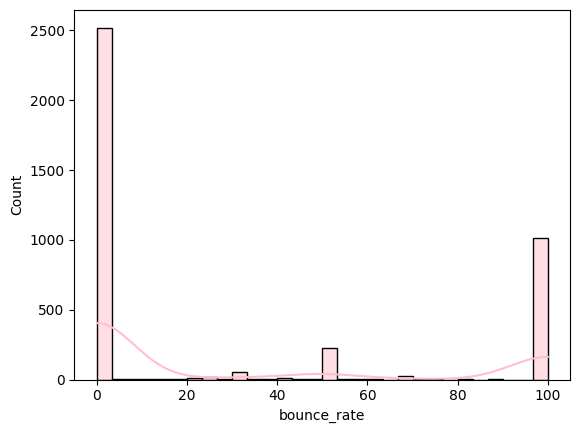

In [ ]:
import seaborn as sns
sns.histplot(df_latest['bounce_rate'], bins=30, kde=True, color='pink')

* **Bounce rate for ['user_ltv_sessions'] > 1**


In [ ]:
df_latest[df_latest['user_ltv_sessions'] > 1]['bounce_rate'].describe()

,bounce_rate
count,594.000000
mean,38.922155
std,29.636344
min,0.000000
25%,0.000000
50%,50.000000
75%,50.000000
max,100.000000


In [ ]:
print(f"Bounce rate for user's with at least 2 sessions: {calc_bounce(df_latest[df_latest['user_ltv_sessions'] > 1])}%")

Bounce rate for user's with at least 2 sessions: 32.73%


<Axes: xlabel='bounce_rate', ylabel='Count'>

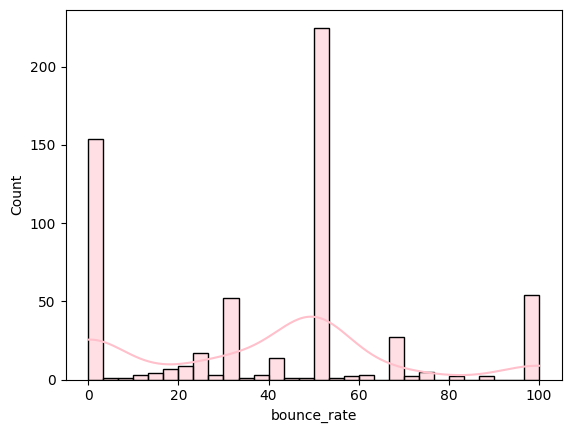

In [ ]:
sns.histplot(df_latest[df_latest['user_ltv_sessions'] > 1]['bounce_rate'], bins=30, kde=True, color='pink')

* **Bounce Rate for Each Continent**



In [ ]:
df_latest.groupby('continent')['bounce_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
,6.0,50.000000,54.772256,0.0,0.0,50.0,100.00,100.0
Africa,21.0,76.190476,43.643578,0.0,100.0,100.0,100.00,100.0
Americas,3734.0,28.853457,42.647602,0.0,0.0,0.0,66.67,100.0
Asia,88.0,64.962045,47.143197,0.0,0.0,100.0,100.00,100.0
Europe,62.0,51.843387,49.350623,0.0,0.0,75.0,100.00,100.0
Oceania,8.0,56.250000,49.551560,0.0,0.0,75.0,100.00,100.0


* **Bounce Rate for Each Country**






In [ ]:
df_latest.groupby('country')['bounce_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
,6.0,50.000000,54.772256,0.0,0.0,50.0,100.0000,100.0
Argentina,1.0,0.000000,NaN,0.0,0.0,0.0,0.0000,0.0
Armenia,1.0,100.000000,NaN,100.0,100.0,100.0,100.0000,100.0
Australia,5.0,70.000000,44.721360,0.0,50.0,100.0,100.0000,100.0
Bangladesh,4.0,75.000000,50.000000,0.0,75.0,100.0,100.0000,100.0
...,...,...,...,...,...,...,...,...
United Kingdom,17.0,50.840588,49.220925,0.0,0.0,50.0,100.0000,100.0
United States,3670.0,28.566433,42.492087,0.0,0.0,0.0,57.7025,100.0
Uzbekistan,1.0,0.000000,NaN,0.0,0.0,0.0,0.0000,0.0


In [ ]:
print(f"Percent from the USA: {sum(df_latest['country'] == 'United States')/df_latest.shape[0] * 100:.2f}%")

Percent from the USA: 93.65%


In [ ]:
print("Bounce rate for the United States only: ")
calc_bounce(df_latest[df_latest['country'] == "United States"])

Bounce rate for the United States only: 


np.float64(29.87)

* **Focusing on Texas**

In [ ]:
print(f"Percent from Texas: {sum(df_latest['region'] == 'Texas') / df_latest.shape[0] * 100:.2f}%")
print(f"Percent with sessions > 1 in Texas: {396/ 2239 * 100:.2f}%")

Percent from Texas: 57.13%
Percent with sessions > 1 in Texas: 17.69%


In [ ]:
print("Bounce rate for people only in Texas:" )
calc_bounce(df_latest[df_latest['region'] == 'Texas'])

Bounce rate for people only in Texas:


np.float64(27.63)

In [ ]:
print("Bounce rate for people only in Texas with more than 1 sessions:")
calc_bounce(df_latest[df_latest['region'] == 'Texas'][df_latest[df_latest['region'] == 'Texas']['user_ltv_sessions'] > 1])

Bounce rate for people only in Texas with more than 1 sessions:


np.float64(30.74)

In [ ]:
print("Bounce rate for people only in Texas with only 1 session:")
calc_bounce(df_latest[df_latest['region'] == 'Texas'][df_latest[df_latest['region'] == 'Texas']['user_ltv_sessions'] == 1])

Bounce rate for people only in Texas with only 1 session:


np.float64(22.63)

* **Focusing on Dallas**

In [ ]:
df_latest[df_latest['city'] == 'Dallas']['bounce_rate'].describe()

,bounce_rate
count,1355.000000
mean,25.498214
std,40.322017
min,0.000000
25%,0.000000
50%,0.000000
75%,50.000000
max,100.000000


In [ ]:
df_latest[df_latest['city'] == 'Dallas'][df_latest[df_latest['city'] == 'Dallas']['user_ltv_sessions'] > 1]['bounce_rate'].describe()

,bounce_rate
count,250.00000
mean,36.20032
std,28.67704
min,0.00000
25%,0.00000
50%,50.00000
75%,50.00000
max,100.00000


In [ ]:
df_latest[df_latest['city'] == 'Dallas'][df_latest[df_latest['city'] == 'Dallas']['user_ltv_sessions'] == 1]['bounce_rate'].describe()

,bounce_rate
count,1105.000000
mean,23.076923
std,42.151582
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,100.000000


In [ ]:
print(f"Percentage of data from Dallas within Texas: {sum(df_latest['city'] == 'Dallas') / df_latest[df_latest['region'] =='Texas'].shape[0] * 100:.2f}%")
print(f"Percentage of data from Dallas out of all df_latest: {sum(df_latest['city'] == 'Dallas') / df_latest.shape[0] * 100:.2f}%")
print(f"Percent with sessions > 1 in Dallas: {250/ 1355 * 100:.2f}%")

Percentage of data from Dallas within Texas: 60.52%
Percentage of data from Dallas out of all df_latest: 34.58%
Percent with sessions > 1 in Dallas: 18.45%


In [ ]:
print("Bounce rate for people in Dallas: ")
calc_bounce(df_latest[(df_latest['city'] == 'Dallas')])

Bounce rate for people in Dallas: 


np.float64(27.98)

In [ ]:
print("Bounce rate for people in Dallas and more than 1 session: ")
calc_bounce(df_latest[(df_latest['city'] == 'Dallas') & (df_latest['user_ltv_sessions'] > 1)])

Bounce rate for people in Dallas and more than 1 session: 


np.float64(31.28)

* **Bounce rate for different device**

In [ ]:
df_latest.groupby(['device_category'])['bounce_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
device_category,,,,,,,,
desktop,1870.0,30.356636,42.995368,0.0,0.0,0.0,100.0,100.0
mobile,2014.0,30.463183,43.894028,0.0,0.0,0.0,100.0,100.0
smart tv,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
tablet,34.0,26.470588,43.056155,0.0,0.0,0.0,50.0,100.0


In [ ]:
df_latest_Texas = df_latest[df_latest['region'] =='Texas']

In [ ]:
# creat a new aggregate database for people only in Texas and group by device_category
df_latest_Texas_device = df_latest_Texas.groupby('device_category').agg({
    'pseudo_user_id': 'count',   # count number of people
    'user_ltv_sessions': 'sum',  # Sum number of sessions
    'user_ltv_engaged_sessions': 'sum',  # Sum number of engaged sessions
    'bounce_rate': 'mean'       # Get average bounce rate
}).reset_index()

df_latest_Texas_device.columns = ['device_category', 'count','user_ltv_sessions','user_ltv_engaged_sessions','bounce_rate']

In [ ]:
# creat a new aggregate database for people only in Texas with sessions > 1 and group by device_category
df_latest_Texas_greater1session = df_latest_Texas[df_latest_Texas['user_ltv_sessions'] > 1].groupby('device_category').agg({
    'pseudo_user_id': 'count',   # count number of people
    'user_ltv_sessions': 'sum',  # Sum number of sessions
    'user_ltv_engaged_sessions': 'sum',  # Sum number of engaged sessions
    'bounce_rate': 'mean'       # Get average bounce rate
}).reset_index()

df_latest_Texas_greater1session.columns = ['device_category', 'count','user_ltv_sessions','user_ltv_engaged_sessions','bounce_rate']

In [ ]:
# creat a new aggregate database for people only in Texas with session = 1 and group by device_category
df_latest_Texas_only1session = df_latest_Texas[df_latest_Texas['user_ltv_sessions'] == 1].groupby('device_category').agg({
    'pseudo_user_id': 'count',   # count number of people
    'user_ltv_sessions': 'sum',  # Sum number of sessions
    'user_ltv_engaged_sessions': 'sum',  # Sum number of engaged sessions
    'bounce_rate': 'mean'       # Get average bounce rate
}).reset_index()

df_latest_Texas_only1session.columns = ['device_category', 'count','user_ltv_sessions','user_ltv_engaged_sessions','bounce_rate']

In [ ]:
print("Device categories for Texas and only have 1 session")
df_latest_Texas[df_latest_Texas['user_ltv_sessions'] == 1].groupby('device_category').agg({
    'user_ltv_sessions': 'count',  # Count number of sessions
    'bounce_rate': 'mean'       # Get average bounce rate
}).reset_index()

Device categories for Texas and only have 1 session


,device_category,user_ltv_sessions,bounce_rate
0,desktop,546,13.003663
1,mobile,1274,26.766091
2,tablet,23,21.739130


In [ ]:
print("Device categories for Texas and session number > 1")
df_latest_Texas[df_latest_Texas['user_ltv_sessions'] >1].groupby('device_category').agg({
    'user_ltv_sessions': 'count',  # Count number of sessions
    'bounce_rate': 'mean'       # Get average bounce rate
}).reset_index()

Device categories for Texas and session number > 1


,device_category,user_ltv_sessions,bounce_rate
0,desktop,199,33.785025
1,mobile,194,39.450000
2,tablet,3,33.333333


In [ ]:
devices_texas = df_latest_Texas['device_category'].unique().tolist()
df_Texas_list = [df_latest_Texas_device, df_latest_Texas_greater1session,df_latest_Texas_only1session]
tem_list = []
for d in df_Texas_list:
  temp_dict = {}
  for i in devices_texas:
    num = calc_bounce(d[d['device_category'] == i])
    temp_dict[i] = num
  tem_list.append(temp_dict)

print("Bounce rate: ")
print(pd.DataFrame(tem_list,index=['All of Texas', 'Texas, sessions > 1', 'Texas, sessions = 1']))


Bounce rate: 
                     desktop  mobile  tablet
All of Texas           26.07   30.24   24.14
Texas, sessions > 1    29.01   38.48   33.33
Texas, sessions = 1    13.00   26.77   21.74


## Outliers

**Identify Outliers**

In [ ]:
Q1 = df_latest['user_ltv_sessions'].quantile(0.25)
Q3 = df_latest['user_ltv_sessions'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_latest[(df_latest['user_ltv_sessions']< Q1 - 1.5 * IQR) | (df_latest['user_ltv_sessions'] > Q3 + 1.5 * IQR)]

In [ ]:
outliers

,pseudo_user_id,stream_id,user_last_active_timestamp_micros,user_first_touch_timestamp_micros,device_category,city,region,country,continent,operating_system,...,user_ltv_revenue_in_usd,user_ltv_sessions,user_ltv_engagement_time_millis,user_ltv_purchases,user_ltv_engaged_sessions,user_ltv_session_duration_micros,occurrence_date,last_updated_date,user_ltv_session_duration_millis,bounce_rate
0,1526324155.1662589792,6228347800,1723062203939665,1696291200000000,desktop,Garland,Texas,United States,Americas,web,...,0.0,412.0,47974526.0,None,315.0,3.866025e+11,2024-08-07,2024-08-07,3.866025e+08,23.54
1,1310700488.1721419653,6228347800,1723064420287101,1721347200000000,desktop,Wylie,Texas,United States,Americas,web,...,NaN,4.0,233113.0,None,2.0,4.058210e+08,2024-08-07,2024-08-07,4.058210e+05,50.00
2,736877407.1722895878,6228347800,1723064419699441,1722816000000000,desktop,Idaho Falls,Idaho,United States,Americas,web,...,NaN,2.0,274957.0,None,1.0,2.725856e+09,2024-08-07,2024-08-07,2.725856e+06,50.00
3,983623725.1722450075,6228347800,1723081371109241,1722384000000000,mobile,Fort Worth,Texas,United States,Americas,web,...,NaN,6.0,190130.0,None,3.0,1.841205e+09,2024-08-07,2024-08-07,1.841205e+06,50.00
4,1714044964.1722964269,6228347800,1723057240319000,1722902400000000,mobile,Wellston,Oklahoma,United States,Americas,web,...,NaN,4.0,308768.0,None,4.0,6.913431e+08,2024-08-07,2024-08-07,6.913431e+05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3932,806752950.1715035961,6228347800,1719343468432082,1714953600000000,desktop,Dallas,Texas,United States,Americas,web,...,NaN,4.0,382433.0,None,4.0,2.648613e+09,2024-06-25,2024-06-25,2.648613e+06,0.00
3938,972755920.1719262688,6228347800,1719323790045851,1719187200000000,desktop,Dallas,Texas,United States,Americas,web,...,NaN,2.0,44964.0,None,1.0,4.740702e+07,2024-06-25,2024-06-25,4.740702e+04,50.00
3939,1285469833.1719355958,6228347800,1719360925283993,1719273600000000,mobile,Dallas,Texas,United States,Americas,web,...,NaN,2.0,113793.0,None,1.0,1.296746e+08,2024-06-25,2024-06-25,1.296746e+05,50.00
3941,1835279551.1702495954,6228347800,1719351867225101,1702425600000000,desktop,Dallas,Texas,United States,Americas,web,...,0.0,4.0,14591.0,None,1.0,6.198009e+07,2024-06-25,2024-06-25,6.198009e+04,75.00


In [ ]:
outliers.shape[0] / df_latest.shape[0]

0.15156927787700944

Around 15% of users are outliers

<Axes: ylabel='user_ltv_sessions'>

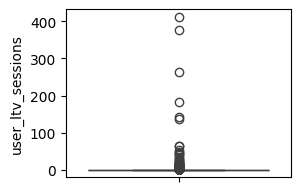

In [ ]:
# Visulazation
plt.subplot(2, 2, 1)
sns.boxplot(y=df_latest['user_ltv_sessions'])

<Axes: xlabel='user_ltv_sessions', ylabel='Count'>

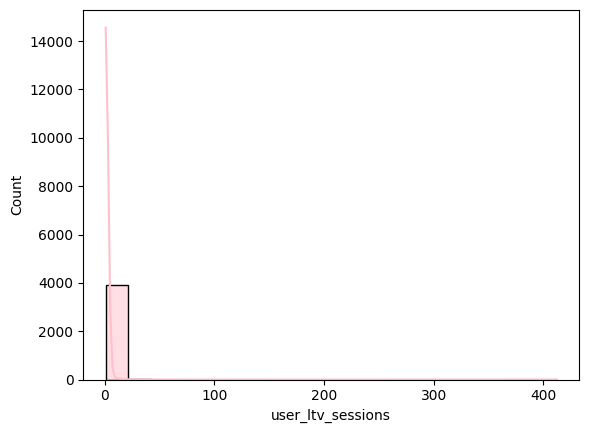

In [ ]:
sns.histplot(df_latest['user_ltv_sessions'], bins=20, kde=True, color='pink')

**Handling Outliers**

Since the outliers are not due to data entry errors or measurement issues, so we do not consider to remove them.

The data is highly right - skwed so we applied two methods to transform outliers


*   Log Transformation: Reduces the impact of large outliers
*   Winsorization: Capping extreme values at the 5th and 95th percentiles


**Method 1) Log-Transformation**

Transform the 'user_ltv_sessions' column into log form and test if this approach reduced outliers or not

In [ ]:
df_latest['user_ltv_sessions_log'] = np.log1p(df_latest['user_ltv_sessions'])

<ipython-input-84-07798bb77ff9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest['user_ltv_sessions_log'] = np.log1p(df_latest['user_ltv_sessions'])


<Axes: xlabel='user_ltv_sessions_log', ylabel='Count'>

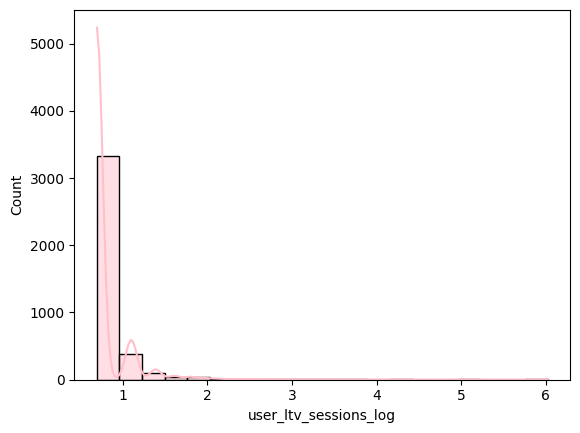

In [ ]:
sns.histplot(df_latest['user_ltv_sessions_log'], bins=20, kde=True, color='pink')

<Axes: ylabel='user_ltv_sessions_log'>

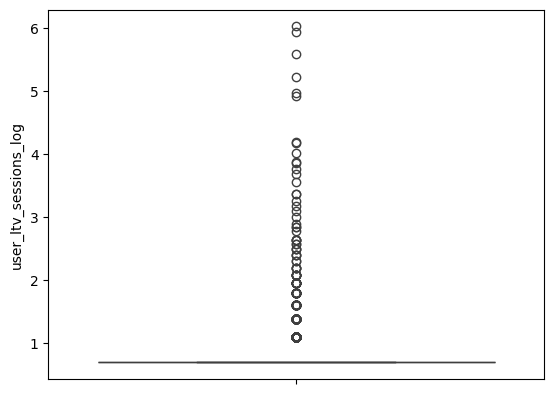

In [ ]:
sns.boxplot(y=df_latest['user_ltv_sessions_log'])

In [ ]:
df_latest[['user_ltv_sessions', 'user_ltv_sessions_log']].describe()

,user_ltv_sessions,user_ltv_sessions_log
count,3919.000000,3919.000000
mean,1.801990,0.798736
std,11.017462,0.352880
min,1.000000,0.693147
25%,1.000000,0.693147
50%,1.000000,0.693147
75%,1.000000,0.693147
max,412.000000,6.023448


By comparing the statistics of ```user_ltv_sessions``` and ```user_ltv_sessions_log```, it shows that log-transformation reduced the variance (by compare std in above table) a lot.

By applying log transformation, we stabilized variance, meanwhile, it compresses large values, bringing them closer to the bulk of the data.

Log Transformation reduces outliers' magnitude, making them less influential in our future statistical analysis.


**Method 2) Winsorization**

Capping extreme values at the 5th and 95th percentiles. Or should we only cap the top 10% since the data is skewed?

In [ ]:
from scipy.stats.mstats import winsorize
df_latest['user_ltv_sessions_winsorized']= winsorize(df_latest['user_ltv_sessions'], limits=[0.05, 0.05])

<ipython-input-88-198bb57cca4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest['user_ltv_sessions_winsorized']= winsorize(df_latest['user_ltv_sessions'], limits=[0.05, 0.05])


In [ ]:
df_latest[['user_ltv_sessions','user_ltv_sessions_winsorized']].describe()

,user_ltv_sessions,user_ltv_sessions_winsorized
count,3919.000000,3919.000000
mean,1.801990,1.207196
std,11.017462,0.524966
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,412.000000,3.000000


<Axes: xlabel='user_ltv_sessions_winsorized', ylabel='Count'>

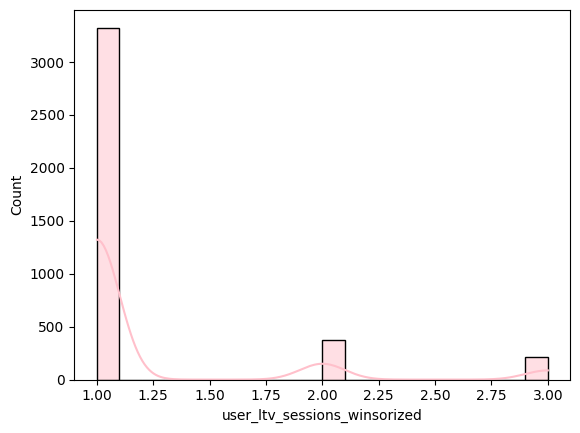

In [ ]:
sns.histplot(df_latest['user_ltv_sessions_winsorized'], bins=20, kde=True, color='pink')

Winsorization makes mean and standard deviation more stable which can leading to more reliable statistical inferences

Winsorization reduces the impact of extreme values while preserving the dataset's overall structure.

It will be useful for Machine Learning Models such as linear regression and k-means clustering which are sensitive to outliers.

# 2/25 RFV Segments

In [ ]:
#Before jumping into RFV, outputted bounce rate for each device category in Texas

devices_texas = df_latest_Texas['device_category'].unique().tolist()
df_Texas_list = [df_latest_Texas_device, df_latest_Texas_greater1session,df_latest_Texas_only1session]
tem_list = []
for d in df_Texas_list:
  temp_dict = {}
  for i in devices_texas:
    num = calc_bounce(d[d['device_category'] == i])
    temp_dict[i] = num
  tem_list.append(temp_dict)

print("Bounce rate: ")
print(pd.DataFrame(tem_list,index=['All of Texas', 'Texas, sessions > 1', 'Texas, sessions = 1']))

Bounce rate: 
                     desktop  mobile  tablet
All of Texas           26.07   30.24   24.14
Texas, sessions > 1    29.01   38.48   33.33
Texas, sessions = 1    13.00   26.77   21.74


## Import RFV csv file

This file is an aggregate statistic that calculates over a window. Use the updated database since recency is calculated correctly. If used more recencly then it's higher.

In [ ]:
#don't use this one since the recency is not calculated correctly
#file_path_rfv = f"{shared_folder_path_rfv}/20240807.csv"

shared_folder_path_rfv = '/content/drive/My Drive/LNL projects/RFV metric data'

file_path_rfv_updated = f"{shared_folder_path_rfv}/20240807_updated.csv"

df_rfv = pd.read_csv(file_path_rfv_updated)
df_rfv

,pseudo_user_id,stream_id,first_appearance,leading.user_ltv.engagement_time_millis,leading.user_ltv.engaged_sessions,trailing.user_ltv.engagement_time_millis,trailing.user_ltv.engaged_sessions,Recency,Normalized_Recency,Frequency,Normalized_Frequency,Volume,Normalized_Volume,Regularity,Normalized_Regularity,RFV,RFV_Tier
0,6.358856e+08,6228347800,2024-06-25,NaN,NaN,NaN,NaN,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
1,1.247964e+09,6228347800,2024-06-25,3338.0,NaN,3338.0,NaN,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
2,2.602055e+08,6228347800,2024-06-25,2214.0,NaN,2214.0,NaN,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
3,2.031542e+09,6228347800,2024-06-25,1626.0,NaN,1626.0,NaN,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
4,3.599706e+08,6228347800,2024-06-25,9762.0,NaN,9762.0,NaN,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,1.007599e+09,6228347800,2024-08-07,12759.0,1.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
3953,1.190453e+08,6228347800,2024-08-07,67139.0,2.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
3954,9.050456e+08,6228347800,2024-08-07,10631.0,1.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
3955,1.692309e+09,6228347800,2024-08-07,38567.0,1.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1


In [ ]:
sum(df_rfv['pseudo_user_id'].value_counts() >1), len(df_rfv), len(df_rfv) - sum(df_rfv['pseudo_user_id'].value_counts() >1)

(0, 3957, 3957)

No duplicates in this RFV data, so that means each user has their latest information entered.

## RFV Formula

RFV = (Norm(Frequency) + Norm(Regularity) + Norm(Volume)) * Norm(Recency)

from sklearn.preprocessing import MinMaxScaler #normalization funciton used

RFV = (Norm(Frequency) + Norm(Regularity) + Norm(Volume))

In [ ]:
df_rfv[df_rfv['RFV'] != 0].head() #looking at examples when RFV is not 0

,pseudo_user_id,stream_id,first_appearance,leading.user_ltv.engagement_time_millis,leading.user_ltv.engaged_sessions,trailing.user_ltv.engagement_time_millis,trailing.user_ltv.engaged_sessions,Recency,Normalized_Recency,Frequency,Normalized_Frequency,Volume,Normalized_Volume,Regularity,Normalized_Regularity,RFV,RFV_Tier
9,4.560858e+08,6228347800,2024-06-25,1301.0,NaN,1301.0,NaN,20.0,0.333333,0.0,0.000000,0.0,0.000000,2.0,0.066667,0.022222,T1
61,9.195328e+08,6228347800,2024-06-25,51148.0,3.0,32461.0,1.0,29.0,0.033333,2.0,0.086957,18687.0,0.007768,2.0,0.066667,0.005380,T1
76,1.046697e+09,6228347800,2024-06-25,376610.0,2.0,195517.0,1.0,28.0,0.066667,1.0,0.043478,181093.0,0.075275,3.0,0.133333,0.016806,T1
80,1.213960e+09,6228347800,2024-06-25,278331.0,4.0,144640.0,3.0,23.0,0.233333,1.0,0.043478,133691.0,0.055571,2.0,0.066667,0.038667,T1
85,2.384467e+07,6228347800,2024-06-25,75889.0,3.0,58473.0,1.0,28.0,0.066667,2.0,0.086957,17416.0,0.007239,2.0,0.066667,0.010724,T1


In [ ]:
#Check RFV formula for 1 user
(0.086957 + 0.066667 + 0.007768) * 0.0333333	 #for user ID 9.195328e+08

0.005379727953600001

The RFV is already inputted into the data. So need to understand how each column impacts the RFV.

## Merge the 2 databases

In [ ]:
#check if user ID in df_rfv
sum(df_latest['pseudo_user_id'].isin(df_rfv['pseudo_user_id']))

0

In [ ]:
df_rfv.dtypes['pseudo_user_id'], df_latest.dtypes['pseudo_user_id']

(dtype('float64'), dtype('O'))

In [ ]:
df_latest['pseudo_user_id'] = df_latest['pseudo_user_id'].astype(float)
df_rfv.dtypes['pseudo_user_id'], df_latest.dtypes['pseudo_user_id']

<ipython-input-98-d41e079f0089>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_latest['pseudo_user_id'] = df_latest['pseudo_user_id'].astype(float)


(dtype('float64'), dtype('float64'))

In [ ]:
only_df_latest = df_latest[~df_latest['pseudo_user_id'].isin(df_rfv['pseudo_user_id'])]
only_df_rfv = df_rfv[~df_rfv['pseudo_user_id'].isin(df_latest['pseudo_user_id'])]

print("Number of IDs only in df_latest: ", len(only_df_latest))
print("Number of IDs only in df_rfv: ", len(only_df_rfv))

Number of IDs only in df_latest:  1550
Number of IDs only in df_rfv:  1588


This is ok that not everyone is in the RFV database because google analytics might output some people if they are not relevant enough or they updated their data. The RFV data was also only pulled with each user having at least more than 1 lifetime session.

In [ ]:
merged_df = df_latest.merge(df_rfv,on='pseudo_user_id', how='inner')

By using how = 'inner', we only include users that in both ```df_latest``` and ```df_rfv``` database

In [ ]:
merged_df

,pseudo_user_id,stream_id_x,user_last_active_timestamp_micros,user_first_touch_timestamp_micros,device_category,city,region,country,continent,operating_system,...,Recency,Normalized_Recency,Frequency,Normalized_Frequency,Volume,Normalized_Volume,Regularity,Normalized_Regularity,RFV,RFV_Tier
0,1.310700e+09,6228347800,1723064420287101,1721347200000000,desktop,Wylie,Texas,United States,Americas,web,...,0.0,1.0,1.0,0.043478,4197.0,0.001745,4.0,0.200000,0.245223,T1
1,7.368774e+08,6228347800,1723064419699441,1722816000000000,desktop,Idaho Falls,Idaho,United States,Americas,web,...,0.0,1.0,0.0,0.000000,5292.0,0.002200,2.0,0.066667,0.068866,T1
2,5.870406e+08,6228347800,1723032837358971,1722902400000000,mobile,Dallas,Texas,United States,Americas,web,...,0.0,1.0,0.0,0.000000,320.0,0.000133,2.0,0.066667,0.066800,T1
3,3.439753e+08,6228347800,1723040781467069,1722816000000000,mobile,Trumann,Arkansas,United States,Americas,web,...,0.0,1.0,0.0,0.000000,0.0,0.000000,2.0,0.066667,0.066667,T1
4,1.205237e+08,6228347800,1723062243631864,1699315200000000,desktop,Dallas,Texas,United States,Americas,web,...,0.0,1.0,9.0,0.391304,800237.0,0.332633,10.0,0.600000,1.323938,T3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,6.308043e+08,6228347800,1719348379943397,1719273600000000,desktop,Altoona,Iowa,United States,Americas,web,...,30.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,T1
2365,6.684055e+08,6228347800,1719313654831503,1719273600000000,desktop,Boydton,Virginia,United States,Americas,web,...,30.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,T1
2366,3.978465e+08,6228347800,1719357077467482,1719273600000000,desktop,Chicago,Illinois,United States,Americas,web,...,30.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,T1
2367,1.553161e+09,6228347800,1719343855685626,1719273600000000,mobile,Phoenix,Arizona,United States,Americas,web,...,30.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,T1


In [ ]:
df_rfv['RFV_Tier'].value_counts() #5 bins of equal size pandas cut method

,count
RFV_Tier,
T1,3947
T3,4
T2,4
T5,1
T4,1


In [ ]:
#examining when RFV tier is T1 and RFV is not 0
df_rfv[(df_rfv['RFV_Tier'] == 'T1') & (df_rfv['RFV'] != 0)]

,pseudo_user_id,stream_id,first_appearance,leading.user_ltv.engagement_time_millis,leading.user_ltv.engaged_sessions,trailing.user_ltv.engagement_time_millis,trailing.user_ltv.engaged_sessions,Recency,Normalized_Recency,Frequency,Normalized_Frequency,Volume,Normalized_Volume,Regularity,Normalized_Regularity,RFV,RFV_Tier
9,4.560858e+08,6228347800,2024-06-25,1301.0,NaN,1301.0,NaN,20.0,0.333333,0.0,0.000000,0.0,0.000000,2.0,0.066667,0.022222,T1
61,9.195328e+08,6228347800,2024-06-25,51148.0,3.0,32461.0,1.0,29.0,0.033333,2.0,0.086957,18687.0,0.007768,2.0,0.066667,0.005380,T1
76,1.046697e+09,6228347800,2024-06-25,376610.0,2.0,195517.0,1.0,28.0,0.066667,1.0,0.043478,181093.0,0.075275,3.0,0.133333,0.016806,T1
80,1.213960e+09,6228347800,2024-06-25,278331.0,4.0,144640.0,3.0,23.0,0.233333,1.0,0.043478,133691.0,0.055571,2.0,0.066667,0.038667,T1
85,2.384467e+07,6228347800,2024-06-25,75889.0,3.0,58473.0,1.0,28.0,0.066667,2.0,0.086957,17416.0,0.007239,2.0,0.066667,0.010724,T1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729,5.870406e+08,6228347800,2024-08-06,1071.0,NaN,NaN,NaN,0.0,1.000000,0.0,0.000000,320.0,0.000133,2.0,0.066667,0.066800,T1
3763,3.944732e+08,6228347800,2024-08-06,13210.0,1.0,NaN,NaN,0.0,1.000000,0.0,0.000000,0.0,0.000000,2.0,0.066667,0.066667,T1
3772,1.827536e+09,6228347800,2024-08-06,263923.0,1.0,NaN,NaN,0.0,1.000000,0.0,0.000000,0.0,0.000000,2.0,0.066667,0.066667,T1
3817,9.433803e+08,6228347800,2024-08-06,6789.0,1.0,NaN,NaN,0.0,1.000000,0.0,0.000000,0.0,0.000000,2.0,0.066667,0.066667,T1


## Outliers

Because of higly right-skewed distribution, standard methods like the Interquartile Range (IQR) rule and Z-score method may not be ideal to find outliers because they assume a relatively symmetric distribution. We cannnot use Box-Cox Transformation as well, since it requires all values to be strictly positive (Greater than 0).

For heavily skewed distributions, top 1% or 5% of values may be considered outliers instead of using a fixed rule.

So we define number of ```user_ltv_sessions``` larger than 99 percentile are outliers.



In [ ]:
upper_limit = merged_df['RFV'].quantile(0.90)
upper_limit, sum(merged_df['RFV']==0), merged_df.shape[0] - sum(merged_df['RFV']==0)

(np.float64(0.0), 2224, 145)

Using the top 10% as outliers, the upper limit would be 0. There are only 145 records with a RFV that not equal to 0. So need to look at outliers from the number of sessions.

In [ ]:
upper_limit = merged_df['user_ltv_sessions'].quantile(0.99)
upper_limit, sum(merged_df['user_ltv_sessions']==1), merged_df.shape[0] - sum(merged_df['user_ltv_sessions'] ==1)

(np.float64(7.0), 1999, 370)

With excluding the top 1% of data with high sessions, we have an upper limit of 7 total lifetime sessions in the merged database.

In [ ]:
merged_df_capped = merged_df[merged_df['user_ltv_sessions'] <= upper_limit].reset_index()
merged_df_capped

,index,pseudo_user_id,stream_id_x,user_last_active_timestamp_micros,user_first_touch_timestamp_micros,device_category,city,region,country,continent,...,Recency,Normalized_Recency,Frequency,Normalized_Frequency,Volume,Normalized_Volume,Regularity,Normalized_Regularity,RFV,RFV_Tier
0,0,1.310700e+09,6228347800,1723064420287101,1721347200000000,desktop,Wylie,Texas,United States,Americas,...,0.0,1.0,1.0,0.043478,4197.0,0.001745,4.0,0.200000,0.245223,T1
1,1,7.368774e+08,6228347800,1723064419699441,1722816000000000,desktop,Idaho Falls,Idaho,United States,Americas,...,0.0,1.0,0.0,0.000000,5292.0,0.002200,2.0,0.066667,0.068866,T1
2,2,5.870406e+08,6228347800,1723032837358971,1722902400000000,mobile,Dallas,Texas,United States,Americas,...,0.0,1.0,0.0,0.000000,320.0,0.000133,2.0,0.066667,0.066800,T1
3,3,3.439753e+08,6228347800,1723040781467069,1722816000000000,mobile,Trumann,Arkansas,United States,Americas,...,0.0,1.0,0.0,0.000000,0.0,0.000000,2.0,0.066667,0.066667,T1
4,5,3.944732e+08,6228347800,1723067629368520,1722902400000000,desktop,Dallas,Texas,United States,Americas,...,0.0,1.0,0.0,0.000000,0.0,0.000000,2.0,0.066667,0.066667,T1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,2364,6.308043e+08,6228347800,1719348379943397,1719273600000000,desktop,Altoona,Iowa,United States,Americas,...,30.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,T1
2344,2365,6.684055e+08,6228347800,1719313654831503,1719273600000000,desktop,Boydton,Virginia,United States,Americas,...,30.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,T1
2345,2366,3.978465e+08,6228347800,1719357077467482,1719273600000000,desktop,Chicago,Illinois,United States,Americas,...,30.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,T1
2346,2367,1.553161e+09,6228347800,1719343855685626,1719273600000000,mobile,Phoenix,Arizona,United States,Americas,...,30.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,T1


## RFV Statistic Description

Run an independent two- sample t- test. Need to compare RFV with different groups.

Compare if there any difference in RFV between Dallas and Non-Dallas users


In [ ]:
from scipy import stats

# Split data into two groups: Dallas vs. Not Dallas
rfv_dallas = merged_df[merged_df['city'] == 'Dallas']['RFV']
rfv_not_dallas = merged_df[merged_df['city'] != 'Dallas']['RFV']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(rfv_dallas, rfv_not_dallas, equal_var=False)  # Welch's t-test

print(f"T-statistic: {t_stat:.4}, P-value: {p_value:.4}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in RFV between Dallas and non-Dallas users.")
else:
    print("No significant difference in RFV between Dallas and non-Dallas users.")


T-statistic: 0.008643, P-value: 0.9931
No significant difference in RFV between Dallas and non-Dallas users.


In [ ]:
# Split data into two groups: Dallas vs. Not Dallas
rfv_dallas = merged_df_capped[merged_df_capped['city'] == 'Dallas']['RFV']
rfv_not_dallas = merged_df_capped[merged_df_capped['city'] != 'Dallas']['RFV']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(rfv_dallas, rfv_not_dallas, equal_var=False)  # Welch's t-test

print(f"T-statistic: {t_stat:.4}, P-value: {p_value:.4}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in RFV between Dallas and non-Dallas users.")
else:
    print("No significant difference in RFV between Dallas and non-Dallas users.")


T-statistic: 0.03574, P-value: 0.9715
No significant difference in RFV between Dallas and non-Dallas users.


In [ ]:
from scipy.stats import shapiro

print("Dallas Normality Test:", shapiro(rfv_dallas))
print("Non-Dallas Normality Test:", shapiro(rfv_not_dallas))

Dallas Normality Test: ShapiroResult(statistic=np.float64(0.1811426232459168), pvalue=np.float64(2.6444122633821643e-50))
Non-Dallas Normality Test: ShapiroResult(statistic=np.float64(0.17493768247087216), pvalue=np.float64(3.301005479317997e-63))


The output above shows that the data is not normally distributed using the Shapiro-Wilk normality test. So we should use a Mann-Whitney U Test since the data is extremly skewed. This test compares medians rather than means and does not assume normalcy.

In [ ]:
# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(rfv_dallas, rfv_not_dallas, alternative='two-sided') # database is merged_df_capped

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in RFV between Dallas and non-Dallas users.")
else:
    print("No significant difference in RFV between Dallas and non-Dallas users.")

U-statistic: 621478.5, P-value: 0.7759675674552313
No significant difference in RFV between Dallas and non-Dallas users.


In [ ]:
# Split data into two groups
rfv_texas = merged_df_capped[merged_df_capped['region'] == 'Texas']['RFV']
rfv_not_texas = merged_df_capped[merged_df_capped['region'] != 'Texas']['RFV']

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(rfv_texas, rfv_not_texas, alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in RFV between Texas and non-Texas users.")
else:
    print("No significant difference in RFV between Texas and non-Texas users.")

U-statistic: 675203.5, P-value: 0.7266590062014495
No significant difference in RFV between Texas and non-Texas users.


In [ ]:
# Split data into two groups
rfv_texas_not_dallas = merged_df_capped[(merged_df_capped['region'] == 'Texas') & (merged_df_capped['city'] != 'Dallas')]['RFV']
rfv_dallas = merged_df_capped[merged_df_capped['city'] == 'Dallas']['RFV']

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(rfv_texas_not_dallas, rfv_dallas, alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in RFV between Dallas and Texan (but non- Dallas) users.")
else:
    print("No significant difference in RFV between Dallas and Texan (but non- Dallas) users.")

U-statistic: 222363.0, P-value: 0.534470954517504
No significant difference in RFV between Dallas and Texan (but non- Dallas) users.


Now look between device categories:

In [ ]:
merged_df_capped['device_category'].value_counts()

,count
device_category,
mobile,1219
desktop,1106
tablet,23


In [ ]:
# Split data into two groups
rfv_mobile = merged_df_capped[merged_df_capped['device_category'] == 'mobile']['RFV']
rfv_not_mobile = merged_df_capped[merged_df_capped['device_category'] != 'mobile']['RFV']

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(rfv_mobile, rfv_not_mobile, alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in RFV between mobile and non-mobile users.")
else:
    print("No significant difference in RFV between mobile and non-mobile users.")

U-statistic: 661469.5, P-value: 4.7362103383114845e-05
Significant difference in RFV between mobile and non-mobile users.


In [ ]:
len(rfv_not_mobile), sum(rfv_not_mobile != 0)

(1129, 86)

In [ ]:
rfv_mobile[rfv_mobile !=0].describe()

,RFV
count,46.000000
mean,0.068538
std,0.051258
min,0.006667
25%,0.038348
50%,0.055450
75%,0.075608
max,0.268528


In [ ]:
rfv_not_mobile[rfv_not_mobile !=0].describe()

,RFV
count,86.000000
mean,0.080878
std,0.075111
min,0.003789
25%,0.040000
50%,0.064561
75%,0.095580
max,0.537632


<Axes: xlabel='RFV', ylabel='Count'>

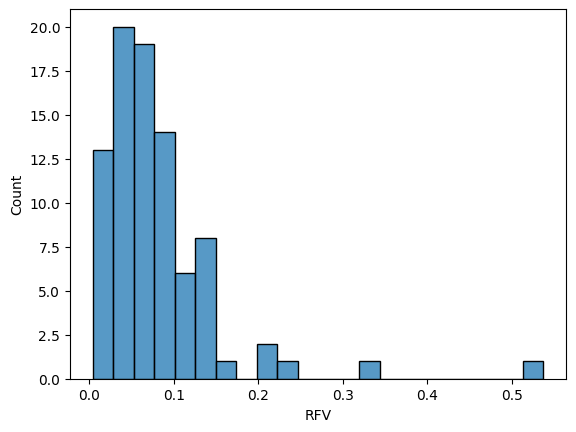

In [ ]:
sns.histplot(rfv_not_mobile[(rfv_not_mobile !=0)])

<Axes: xlabel='RFV', ylabel='Count'>

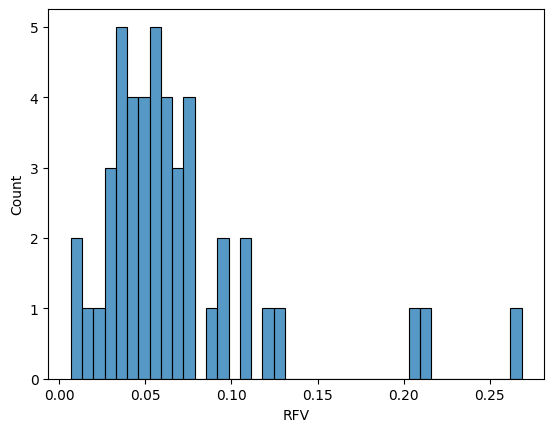

In [ ]:
sns.histplot(rfv_mobile[rfv_mobile !=0],bins=40)

In [ ]:
# Split data into two groups
rfv_desktop = merged_df_capped[merged_df_capped['device_category'] == 'desktop']['RFV']
rfv_not_desktop = merged_df_capped[merged_df_capped['device_category'] != 'desktop']['RFV']

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(rfv_desktop, rfv_not_desktop, alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in RFV between desktop and non-desktop users.")
else:
    print("No significant difference in RFV between desktop and non-desktop users.")

U-statistic: 713784.5, P-value: 3.816177966657965e-05
Significant difference in RFV between desktop and non-desktop users.


In [ ]:
print(f"Desktop users with non- zero RFV: {sum(rfv_desktop != 0)/len(rfv_desktop):.4f}%")
print(f"Mobile users with non- zero RFV: {sum(rfv_mobile != 0)/len(rfv_mobile):.4f}%")

Desktop users with non- zero RFV: 0.0769%
Mobile users with non- zero RFV: 0.0377%


In [ ]:
rfv_not_desktop.describe()

,RFV
count,1242.000000
mean,0.002625
std,0.016486
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.268528


In [ ]:
rfv_desktop.describe()

,RFV
count,1106.000000
mean,0.006192
std,0.029904
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.537632


In [ ]:
# Split data into two groups
rfv_texas = merged_df_capped[(merged_df_capped['device_category'] == 'mobile') & (merged_df_capped['region'] == 'Texas')]['RFV']
rfv_not_texas = merged_df_capped[(merged_df_capped['device_category'] == 'mobile') & (merged_df_capped['region'] != 'Texas')]['RFV']

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(rfv_texas, rfv_not_texas, alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in RFV between mobile/Texasand mobile/non-Texas users.")
else:
    print("No significant difference in RFV between mobile/Texas and mobile/non-Texas users.")

U-statistic: 142689.5, P-value: 0.19945497844686533
No significant difference in RFV between mobile/Texas and mobile/non-Texas users.


In [ ]:
# Split data into two groups
rfv_desktop = merged_df_capped[(merged_df_capped['device_category'] == 'mobile') & (merged_df_capped['city'] == 'Dallas')]['RFV']
rfv_not_desktop = merged_df_capped[(merged_df_capped['device_category'] == 'mobile') & (merged_df_capped['city'] != 'Dallas')]['RFV']

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(rfv_desktop, rfv_not_desktop, alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in RFV between mobile/Dallas and mobile/non-Dallas users.")
else:
    print("No significant difference in RFV between mobile/Dallas and mobile/non-Dallas users.")

U-statistic: 184649.0, P-value: 0.9077712466464024
No significant difference in RFV between mobile/Dallas and mobile/non-Dallas users.


Using the Mann Whitney U- test, there is a significant difference between mobile users and non-mobile users. There is also a significant difference between desktop and non- desktop users. But interesting enough, when we narrow down our data to look just at Texas, there was no significant difference in any device category. Same when only looking at Dallas.

In [ ]:
merged_df_onesession = merged_df[merged_df['user_ltv_sessions'] == 1].reset_index()
merged_df_capped_onesession = merged_df_capped[merged_df_capped['user_ltv_sessions'] == 1].reset_index()
merged_df_returningsession = merged_df[merged_df['user_ltv_sessions'] > 1].reset_index()
merged_df_capped_returningsession = merged_df_capped[merged_df_capped['user_ltv_sessions'] > 1].reset_index()

In [ ]:
# Split data into two groups
rfv_mobile_returningsession = merged_df_capped_returningsession[merged_df_capped_returningsession['device_category'] == 'mobile']['RFV']
rfv_not_mobile_returningsession = merged_df_capped_returningsession[merged_df_capped_returningsession['device_category'] != 'mobile']['RFV']

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(rfv_mobile_returningsession, rfv_not_mobile_returningsession, alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("For returning users, significant difference in RFV between mobile and non-mobile users.")
else:
    print("For returning users, no significant difference in RFV between mobile and non-mobile users.")

U-statistic: 12182.0, P-value: 0.0002943345761715977
For returning users, significant difference in RFV between mobile and non-mobile users.


<Axes: xlabel='RFV', ylabel='Count'>

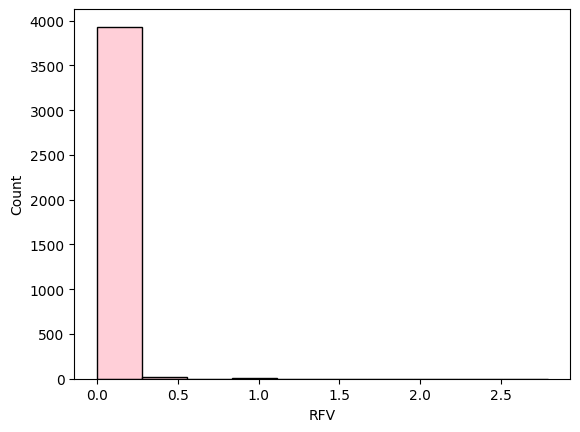

In [ ]:
sns.histplot(df_rfv['RFV'], bins=10, color='pink')

Check the skewnedd of RFV values

In [ ]:
from scipy.stats import skew
print("Skewness:", skew(df_rfv['RFV']))

Skewness: 20.08804416264186


From the plot and skewness value we can find that the data is higly right-skewed.

Since the the distribution is kind of similar to exponential so checked if the RFV value follow an exponential distribution

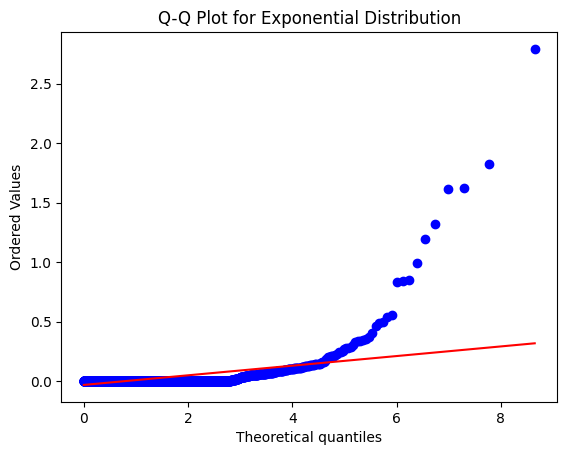

K-S Test Statistic: 0.9381, p-value: 0.0000


In [ ]:
import scipy.stats as stats

# Q-Q plot
stats.probplot(df_rfv['RFV'], dist="expon", plot=plt)
plt.title("Q-Q Plot for Exponential Distribution")
plt.show()

D, p_value = stats.kstest(df_rfv['RFV'], 'expon', args=(0, np.mean(df_rfv['RFV'])))
print(f"K-S Test Statistic: {D:.4f}, p-value: {p_value:.4f}")

However, the p-value does not greater to 0.05, so the data does not follow an exponential distribution

## RFV Weights

Output the correlation matrix between the variables in formula with RFV. Only looking at the df_rfv database.

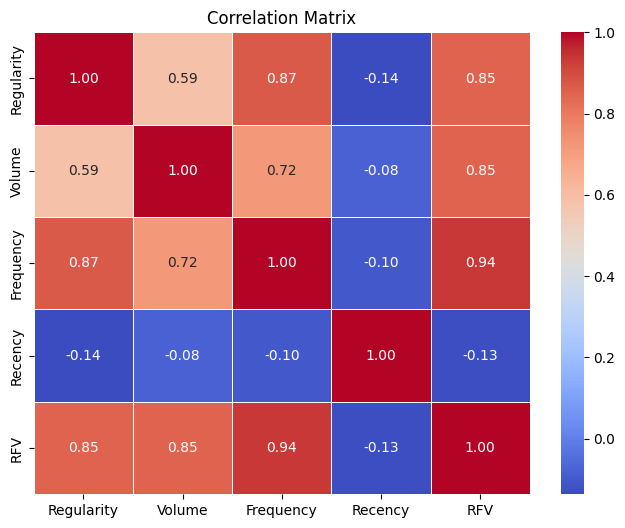

In [ ]:
formula_rfv_cols = ['Regularity','Volume','Frequency','Recency','RFV']
correlation_matrix = df_rfv[formula_rfv_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
formula_rfv_cols = ['Normalized_Regularity','Normalized_Volume','Normalized_Frequency','Normalized_Recency','RFV']

correlation_matrix = df_rfv[formula_rfv_cols].corr()

correlation_matrix['RFV'].sort_values()

,RFV
Normalized_Recency,0.130480
Normalized_Regularity,0.852191
Normalized_Volume,0.852497
Normalized_Frequency,0.936771
RFV,1.000000


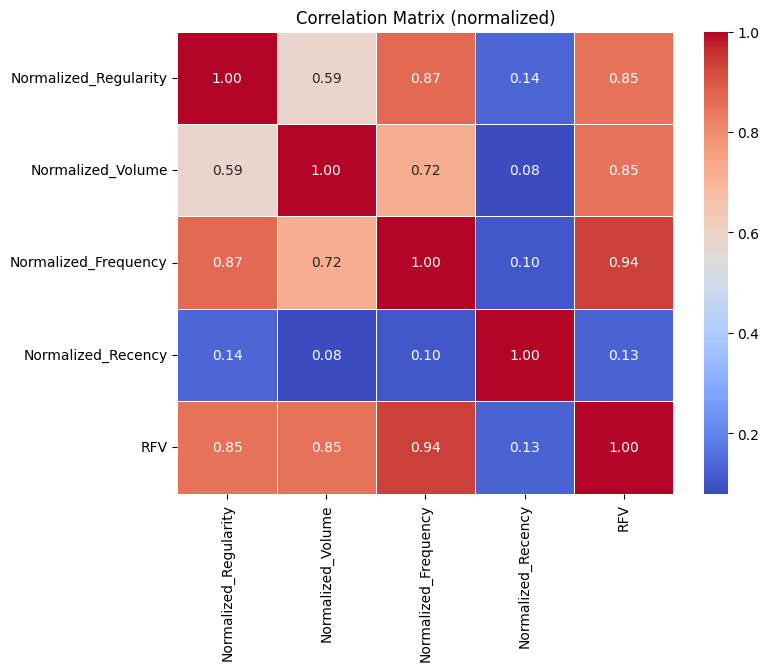

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (normalized)')
plt.show()

Interesting that normalized recency has the lowest correlation with RFV when this value is being multiplied. We think we should look at the range of normalized recency values.

In [ ]:
df_rfv


,pseudo_user_id,stream_id,first_appearance,leading.user_ltv.engagement_time_millis,leading.user_ltv.engaged_sessions,trailing.user_ltv.engagement_time_millis,trailing.user_ltv.engaged_sessions,Recency,Normalized_Recency,Frequency,Normalized_Frequency,Volume,Normalized_Volume,Regularity,Normalized_Regularity,RFV,RFV_Tier
0,6.358856e+08,6228347800,2024-06-25,NaN,NaN,NaN,NaN,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
1,1.247964e+09,6228347800,2024-06-25,3338.0,NaN,3338.0,NaN,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
2,2.602055e+08,6228347800,2024-06-25,2214.0,NaN,2214.0,NaN,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
3,2.031542e+09,6228347800,2024-06-25,1626.0,NaN,1626.0,NaN,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
4,3.599706e+08,6228347800,2024-06-25,9762.0,NaN,9762.0,NaN,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,1.007599e+09,6228347800,2024-08-07,12759.0,1.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
3953,1.190453e+08,6228347800,2024-08-07,67139.0,2.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
3954,9.050456e+08,6228347800,2024-08-07,10631.0,1.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
3955,1.692309e+09,6228347800,2024-08-07,38567.0,1.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1


<Axes: xlabel='Recency', ylabel='Count'>

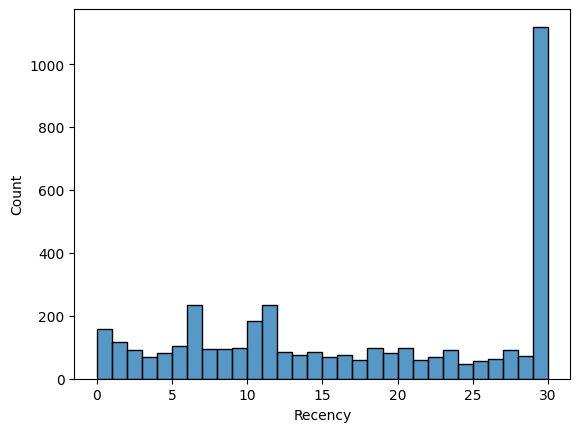

In [ ]:
sns.histplot(df_rfv['Recency'],bins=30)

<Axes: xlabel='Recency', ylabel='Count'>

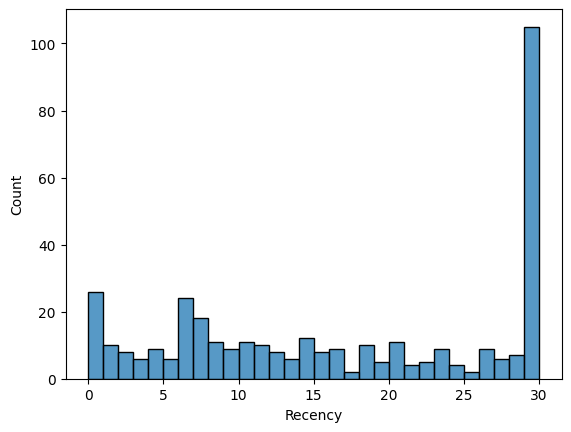

In [ ]:
df_morethan = merged_df[merged_df['user_ltv_sessions'] > 1]
sns.histplot(df_morethan['Recency'],bins=30)

<Axes: xlabel='Frequency', ylabel='Count'>

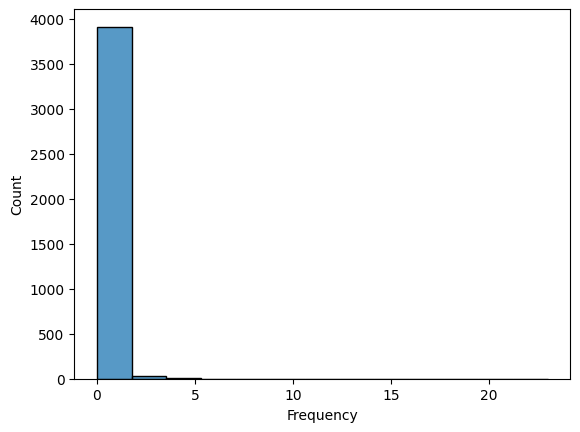

In [ ]:
sns.histplot(df_rfv['Frequency'])

<Axes: xlabel='count', ylabel='Count'>

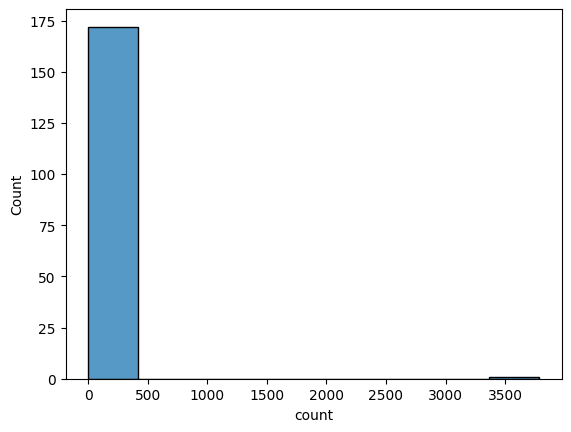

In [ ]:
sns.histplot(df_rfv['Volume'].value_counts())

<Axes: xlabel='Regularity', ylabel='Count'>

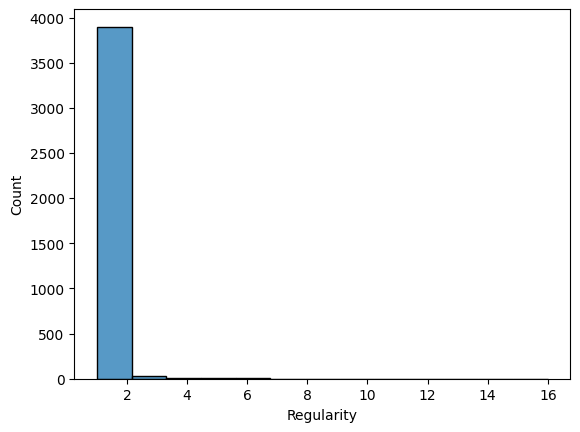

In [ ]:
sns.histplot(df_rfv['Regularity'])

Looking at the range of recency, it makes sense that this column doesn't really have an affect on RFV since the values are not increasing or decreasing in a pattern.

## RFV Sensitivity Analysis

Run a sensitivity analysis and Frequency, Regularity, Volume, Recency are altered by small increments (e.g., -0.1, 0, and 0.1).

In [ ]:
# Create a copy of merged_df to avoid modifying original data
df_copy = df_rfv.copy()

# Create a function to calculate RFV based on the formula
def calculate_rfv(row):
    return (row['Norm(Frequency)'] + row['Norm(Regularity)'] + row['Norm(Volume)']) * row['Norm(Recency)']

# Sensitivity analysis for Frequency
frequency_changes = [-0.1, 0, 0.1]  # Example: Decrease, no change, Increase
impact_frequency = {}

for change in frequency_changes:
    df_copy['Normalized_Frequency_altered'] = df_copy['Normalized_Frequency'] + change
    df_copy['RFV_altered'] = df_copy.apply(lambda row: (row['Normalized_Frequency_altered'] + row['Normalized_Regularity'] + row['Normalized_Volume']) * row['Normalized_Recency'], axis=1)
    impact_frequency[change] = df_copy['RFV_altered'].mean()

print("Impact of Normalized_Frequency changes on RFV:", impact_frequency)


Impact of Normalized_Frequency changes on RFV: {-0.1: np.float64(-0.03358167133723955), 0: np.float64(0.008966555433883359), 0.1: np.float64(0.051514782205006264)}


In [ ]:
# Sensitivity analysis for Normalized_Regularity
regularity_changes = [-0.1, 0, 0.1]  # Example: Decrease, no change, Increase
impact_regularity = {}

for change in regularity_changes:
    df_copy['Normalized_Regularity_altered'] = df_copy['Normalized_Regularity'] + change
    df_copy['RFV_altered'] = df_copy.apply(lambda row: (row['Normalized_Frequency'] + row['Normalized_Regularity_altered'] + row['Normalized_Volume']) * row['Normalized_Recency'], axis=1)
    impact_regularity[change] = df_copy['RFV_altered'].mean()

print("Impact of Normalized_Regularity changes on RFV:", impact_regularity)


Impact of Normalized_Regularity changes on RFV: {-0.1: np.float64(-0.03358167133723955), 0: np.float64(0.008966555433883359), 0.1: np.float64(0.051514782205006264)}


In [ ]:
# Sensitivity analysis for Normalized_Volume
volume_changes = [-0.1, 0, 0.1]  # Example: Decrease, no change, Increase
impact_volume = {}

for change in volume_changes:
    df_copy['Normalized_Volume_altered'] = df_copy['Normalized_Volume'] + change
    df_copy['RFV_altered'] = df_copy.apply(lambda row: (row['Normalized_Frequency'] + row['Normalized_Regularity'] + row['Normalized_Volume_altered']) * row['Normalized_Recency'], axis=1)
    impact_volume[change] = df_copy['RFV_altered'].mean()

print("Impact of Normalized_Volume changes on RFV:", impact_volume)


Impact of Normalized_Volume changes on RFV: {-0.1: np.float64(-0.03358167133723955), 0: np.float64(0.008966555433883359), 0.1: np.float64(0.051514782205006264)}


In [ ]:
# Sensitivity analysis for Normalized_Recency
recency_changes = [-0.1, 0, 0.1]  # Example: Decrease, no change, Increase
impact_recency = {}

for change in recency_changes:
    df_copy['Normalized_Recency_altered'] = df_copy['Normalized_Recency'] + change
    df_copy['RFV_altered'] = df_copy.apply(lambda row: (row['Normalized_Frequency'] + row['Normalized_Regularity'] + row['Normalized_Volume']) * row['Normalized_Recency_altered'], axis=1)
    impact_recency[change] = df_copy['RFV_altered'].mean()

print("Impact of Normalized_Recency changes on RFV:", impact_recency)


Impact of Normalized_Recency changes on RFV: {-0.1: np.float64(0.0077220824690487355), 0: np.float64(0.008966555433883359), 0.1: np.float64(0.010211028398717984)}


In [ ]:
print("Impact of Normalized_Frequency changes on RFV:", impact_frequency)
print("Impact of Normalized_Regularity changes on RFV:", impact_regularity)
print("Impact of Normalized_Volume changes on RFV:", impact_volume)
print("Impact of Normalized_Recency changes on RFV:", impact_recency)

Impact of Normalized_Frequency changes on RFV: {-0.1: np.float64(-0.03358167133723955), 0: np.float64(0.008966555433883359), 0.1: np.float64(0.051514782205006264)}
Impact of Normalized_Regularity changes on RFV: {-0.1: np.float64(-0.03358167133723955), 0: np.float64(0.008966555433883359), 0.1: np.float64(0.051514782205006264)}
Impact of Normalized_Volume changes on RFV: {-0.1: np.float64(-0.03358167133723955), 0: np.float64(0.008966555433883359), 0.1: np.float64(0.051514782205006264)}
Impact of Normalized_Recency changes on RFV: {-0.1: np.float64(0.0077220824690487355), 0: np.float64(0.008966555433883359), 0.1: np.float64(0.010211028398717984)}


Again, using sensitivty analysis, normalized receny has a minimal effect on RFV.

# 3/4

## Bounce vs not bounce

Looking at their most recent data and their earliest data and seeing if there is a difference in engaged sessions. So need to use ```df``` database since this one contains all of the sessions over the 44 day time period. The database that contains all of the latest entries is in ```df_latest```.

### Dataframe preparation

In [ ]:
# This dataframe contains each user's earlist data
df_earliest = df.loc[df.groupby('pseudo_user_id')['occurrence_date'].idxmin()].reset_index(drop=True)
df_earliest

,pseudo_user_id,stream_id,user_last_active_timestamp_micros,user_first_touch_timestamp_micros,device_category,city,region,country,continent,operating_system,...,mobile_model_name,unified_screen_name,user_ltv_revenue_in_usd,user_ltv_sessions,user_ltv_engagement_time_millis,user_ltv_purchases,user_ltv_engaged_sessions,user_ltv_session_duration_micros,occurrence_date,last_updated_date
0,1000453189.1721683742,6228347800,1721683881644578,1721606400000000,mobile,Lawrenceburg,Indiana,United States,Americas,web,...,None,Follow-up: U.S. Treasury Direct Express debit ...,NaN,1.0,139273.0,None,1.0,1.398401e+08,2024-07-22,2024-07-22
1,1000530984.1720553189,6228347800,1720553213582941,1720483200000000,mobile,Dallas,Texas,United States,Americas,web,...,None,Dallas Municipal Court Warrant Resolution 2024...,NaN,1.0,24146.0,None,1.0,2.418266e+07,2024-07-09,2024-07-09
2,1000965521.1722384722,6228347800,1722391491394760,1722297600000000,desktop,Chicago,Illinois,United States,Americas,web,...,None,‘Telehealth pod’ at Salem church brings health...,NaN,2.0,630066.0,None,2.0,2.142830e+09,2024-07-30,2024-07-30
3,1001227447.1721826045,6228347800,1721826102796250,1721779200000000,mobile,Dallas,Texas,United States,Americas,web,...,None,The site of Dallas’ original Black high school...,NaN,1.0,57244.0,None,1.0,5.742575e+07,2024-07-24,2024-07-24
4,1001323808.1720556721,6228347800,1720557096593723,1720483200000000,desktop,New York,New York,United States,Americas,web,...,None,dallas journalism and content,NaN,1.0,242787.0,None,1.0,3.741704e+08,2024-07-09,2024-07-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,996289618.1722888536,6228347800,1722888565211682,1722816000000000,mobile,Arlington,Texas,United States,Americas,web,...,None,35th Texas Black Invitational Rodeo - Dallas F...,NaN,1.0,29226.0,None,1.0,2.939022e+07,2024-08-05,2024-08-05
3953,997393700.1719727306,6228347800,1719727311442500,1719705600000000,mobile,Dallas,Texas,United States,Americas,web,...,None,Harold Simmons Park — West Dallas Job Fair - D...,NaN,1.0,NaN,None,NaN,5.521218e+06,2024-06-30,2024-06-30
3954,997421514.1721927300,6228347800,1721927316097556,1721865600000000,desktop,San Jose,California,United States,Americas,web,...,None,New cloud kitchen is a solution for South Dall...,NaN,1.0,15697.0,None,1.0,1.575208e+07,2024-07-25,2024-07-25
3955,998820388.1719346153,6228347800,1719355069066918,1719273600000000,mobile,Dallas,Texas,United States,Americas,web,...,None,Civic Explainer: What is a ‘Neighborhood Stabi...,NaN,2.0,43955.0,None,1.0,4.420667e+07,2024-06-25,2024-06-25


In [ ]:
# Check how many unique users in df_earlist : 3957
len(df_earliest['pseudo_user_id'].unique())

3957

In [ ]:
# Remove missing values for sessions in df_earlist dataframe
df_earliest = df_earliest.dropna(subset=['user_ltv_sessions'])
print(df_earliest['user_ltv_sessions'].isnull().sum())
df_earliest.reset_index(drop=True, inplace= True)

0


In [ ]:
# Check the columns name in df_earlist
df_earliest.columns

Index(['pseudo_user_id', 'stream_id', 'user_last_active_timestamp_micros',
       'user_first_touch_timestamp_micros', 'device_category', 'city',
       'region', 'country', 'continent', 'operating_system', 'category',
       'mobile_brand_name', 'mobile_model_name', 'unified_screen_name',
       'user_ltv_revenue_in_usd', 'user_ltv_sessions',
       'user_ltv_engagement_time_millis', 'user_ltv_purchases',
       'user_ltv_engaged_sessions', 'user_ltv_session_duration_micros',
       'occurrence_date', 'last_updated_date'],
      dtype='object')

In [ ]:
# Check how many users in both df_earlist and df_latest dataframe
sum(df_earliest['pseudo_user_id'].isin(df_latest['pseudo_user_id']))

0

In [ ]:
# pseudo_user_id in two dataframes have different types, so need to change df_earlist's pseudo_user_id column into float type
df_earliest['pseudo_user_id'].dtypes, df_latest['pseudo_user_id'].dtypes

(dtype('O'), dtype('float64'))

In [ ]:
df_earliest['pseudo_user_id'] = df_earliest['pseudo_user_id'].astype(float)
df_earliest['pseudo_user_id'].dtypes

<ipython-input-151-41fb01219cf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_earliest['pseudo_user_id'] = df_earliest['pseudo_user_id'].astype(float)


dtype('float64')

In [ ]:
# Check how many users in both df_earlist and df_latest dataframe again: 3919
sum(df_earliest['pseudo_user_id'].isin(df_latest['pseudo_user_id']))

3919

Now need to see the difference between engaged sessions and number of sessions.

In [ ]:
# Copy the user_ltv_sessions, engaged sessions, time spent, and occurrence_date in df_earlist and renamed them,
# so later we can merge these three columns into df_latest to analysis bounce VS not bounce
df_earliest['user_ltv_sessions_earliest'] = df_earliest['user_ltv_sessions']
df_earliest['user_ltv_engaged_sessions_earliest'] = df_earliest['user_ltv_engaged_sessions']
df_earliest['earliest_date'] = df_earliest['occurrence_date']
df_earliest['user_ltv_engagement_time_millis_earliest'] = df_earliest['user_ltv_engagement_time_millis']
df_earliest['user_ltv_session_duration_millis_earliest'] = df_earliest['user_ltv_session_duration_micros'] /1000

<ipython-input-153-4577f5555cee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_earliest['user_ltv_sessions_earliest'] = df_earliest['user_ltv_sessions']
<ipython-input-153-4577f5555cee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_earliest['user_ltv_engaged_sessions_earliest'] = df_earliest['user_ltv_engaged_sessions']
<ipython-input-153-4577f5555cee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [ ]:
df_earliest[['pseudo_user_id','user_ltv_engaged_sessions_earliest','user_ltv_sessions_earliest','user_ltv_session_duration_millis_earliest','user_ltv_engagement_time_millis_earliest','earliest_date']]

,pseudo_user_id,user_ltv_engaged_sessions_earliest,user_ltv_sessions_earliest,user_ltv_session_duration_millis_earliest,user_ltv_engagement_time_millis_earliest,earliest_date
0,1.000453e+09,1.0,1.0,139840.149,139273.0,2024-07-22
1,1.000531e+09,1.0,1.0,24182.655,24146.0,2024-07-09
2,1.000966e+09,2.0,2.0,2142829.995,630066.0,2024-07-30
3,1.001227e+09,1.0,1.0,57425.750,57244.0,2024-07-24
4,1.001324e+09,1.0,1.0,374170.402,242787.0,2024-07-09
...,...,...,...,...,...,...
3914,9.962896e+08,1.0,1.0,29390.216,29226.0,2024-08-05
3915,9.973937e+08,NaN,1.0,5521.218,NaN,2024-06-30
3916,9.974215e+08,1.0,1.0,15752.075,15697.0,2024-07-25
3917,9.988204e+08,1.0,2.0,44206.670,43955.0,2024-06-25


In [ ]:
df_bounce = pd.merge(df_earliest[['pseudo_user_id','user_ltv_engaged_sessions_earliest','user_ltv_sessions_earliest','user_ltv_session_duration_millis_earliest','user_ltv_engagement_time_millis_earliest','earliest_date']],df_latest,on='pseudo_user_id',how = 'right')

In [ ]:
df_bounce.columns

Index(['pseudo_user_id', 'user_ltv_engaged_sessions_earliest',
       'user_ltv_sessions_earliest',
       'user_ltv_session_duration_millis_earliest',
       'user_ltv_engagement_time_millis_earliest', 'earliest_date',
       'stream_id', 'user_last_active_timestamp_micros',
       'user_first_touch_timestamp_micros', 'device_category', 'city',
       'region', 'country', 'continent', 'operating_system', 'category',
       'mobile_brand_name', 'mobile_model_name', 'unified_screen_name',
       'user_ltv_revenue_in_usd', 'user_ltv_sessions',
       'user_ltv_engagement_time_millis', 'user_ltv_purchases',
       'user_ltv_engaged_sessions', 'user_ltv_session_duration_micros',
       'occurrence_date', 'last_updated_date',
       'user_ltv_session_duration_millis', 'bounce_rate',
       'user_ltv_sessions_log', 'user_ltv_sessions_winsorized'],
      dtype='object')

In [ ]:
# Rearrange the columns' sequence in df_bounce
df_bounce =df_bounce[['pseudo_user_id',
       'user_last_active_timestamp_micros',
       'user_first_touch_timestamp_micros',
        'device_category', 'city',
       'region', 'country', 'category',
       'user_ltv_session_duration_millis','user_ltv_engagement_time_millis',
      'user_ltv_session_duration_millis_earliest','user_ltv_engagement_time_millis_earliest',
        'user_ltv_engaged_sessions', 'user_ltv_sessions','user_ltv_engaged_sessions_earliest',
       'user_ltv_sessions_earliest', 'occurrence_date', 'earliest_date', 'bounce_rate']]

Since in later part, we need analysis RFV for users in different segments, so we merged the ```df_bounce``` with ```df_rfv```. There won't be an RFV for everyone.

```df_bounce``` will contain each unique user's earlist and latest entry, RFV and other quantities.

In [ ]:
df_rfv.head(5)

,pseudo_user_id,stream_id,first_appearance,leading.user_ltv.engagement_time_millis,leading.user_ltv.engaged_sessions,trailing.user_ltv.engagement_time_millis,trailing.user_ltv.engaged_sessions,Recency,Normalized_Recency,Frequency,Normalized_Frequency,Volume,Normalized_Volume,Regularity,Normalized_Regularity,RFV,RFV_Tier
0,6.358856e+08,6228347800,2024-06-25,NaN,NaN,NaN,NaN,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
1,1.247964e+09,6228347800,2024-06-25,3338.0,NaN,3338.0,NaN,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
2,2.602055e+08,6228347800,2024-06-25,2214.0,NaN,2214.0,NaN,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
3,2.031542e+09,6228347800,2024-06-25,1626.0,NaN,1626.0,NaN,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1
4,3.599706e+08,6228347800,2024-06-25,9762.0,NaN,9762.0,NaN,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T1


In [ ]:
# Merging with a LEFT JOIN to keep all rows from df_main
df_bounce = df_bounce.merge(df_rfv[['pseudo_user_id','Normalized_Recency','Normalized_Frequency','Normalized_Volume','Normalized_Regularity','RFV']],on='pseudo_user_id',how = 'left')
# Merging with a LEFT JOIN to keep all rows from df_main
print(len(df_bounce['pseudo_user_id'].unique()) == len(df_bounce))
print(len(df_bounce['pseudo_user_id'].unique()))

True
3919


Ok that some RFV values are NAN since they weren't in the RFV database.

In [ ]:
#difference b/w latest number of lifetime sessions and earliest lifetime sessions
df_bounce['difference_sessions'] = df_bounce['user_ltv_sessions'] - df_bounce['user_ltv_sessions_earliest']
df_bounce['difference_engaged_sessions'] = df_bounce['user_ltv_engaged_sessions'] - df_bounce['user_ltv_engaged_sessions_earliest']

In [ ]:
sum(df_bounce['difference_sessions'] != 0) , sum(df_bounce['difference_engaged_sessions'] != 0)

(279, 1184)

In [ ]:
print(sum(df_bounce['difference_engaged_sessions'].isna()))
print(sum(df_bounce['user_ltv_engaged_sessions_earliest'].isna()))
print(sum(df_bounce['user_ltv_engaged_sessions'].isna()))

1026
1026
0


Then we found there are lots of missing values in ```difference_engaged_sessions``` and all of these NaNs are caused by missing value in ```user_ltv_engaged_sessions_earliest``` column.

This may cause later analysis unaccurate, so we replaced these missing values with 0

In [ ]:
df_bounce['user_ltv_engaged_sessions_earliest'].fillna(0, inplace=True)
df_bounce['difference_engaged_sessions'] = df_bounce['user_ltv_engaged_sessions'] - df_bounce['user_ltv_engaged_sessions_earliest']

<ipython-input-163-ab56f3954446>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bounce['user_ltv_engaged_sessions_earliest'].fillna(0, inplace=True)


In [ ]:
print(sum(df_bounce['difference_engaged_sessions'].isna()))
print(sum(df_bounce['difference_sessions'].isna()))

0
0


In [ ]:
# Check the number of difference in sessions (engaged sessions) again, now the number makes sense
sum(df_bounce['difference_sessions'] != 0) , sum(df_bounce['difference_engaged_sessions'] != 0)

(279, 171)

When ```difference_sessions``` is 0, that means the user only had one session during the 44 day period. If ```difference_sessions``` is not 0, but ```difference_engaged_sessions```is zero, then they only bounced during the 44 day period.

In [ ]:
sum((df_bounce['difference_sessions']!=0) & (df_bounce['difference_engaged_sessions']==0))

108

In [ ]:
print(f"Number of rows: {len(df_bounce)}")
print(f"Number who only had engaged sessions in the 44 days: {sum((df_bounce['difference_sessions']==df_bounce['difference_engaged_sessions']) & (df_bounce['difference_sessions']!=0))}")

Number of rows: 3919
Number who only had engaged sessions in the 44 days: 103


In [ ]:
df_bounce[(df_bounce['difference_sessions'] ==0) & (df_bounce['user_ltv_sessions_earliest'] != 1)][['user_ltv_sessions_earliest','user_ltv_sessions']]

,user_ltv_sessions_earliest,user_ltv_sessions
292,2.0,2.0
297,2.0,2.0
299,39.0,39.0
305,2.0,2.0
317,2.0,2.0
...,...,...
3894,4.0,4.0
3900,2.0,2.0
3901,2.0,2.0
3903,4.0,4.0


In [ ]:
#df to be used later
df_segments_analysis = df_bounce.merge(df_rfv[['pseudo_user_id', 'RFV_Tier','RFV']], on='pseudo_user_id', how='inner')

Convert ```user_last_active_timestamp_micros``` and ```user_first_touch_timestamp_micros``` to a date. The first one is the date of the user's last activity. The second one is date of the user's first_open or first_visit event, whichever is earlier (timestamp in microseconds).



In [ ]:
df_bounce['last_active_date'] = pd.to_datetime(df_bounce['user_last_active_timestamp_micros'], unit='us').dt.date
df_bounce['first_visit_date'] = pd.to_datetime(df_bounce['user_first_touch_timestamp_micros'], unit='us')

In [ ]:
#convert the session duration and engaged session duration to minutes
df_bounce['ltv_session_duration_mins'] = df_bounce['user_ltv_session_duration_millis'] / 60000
df_bounce['ltv_engaged_duration_mins'] = df_bounce['user_ltv_engagement_time_millis'] / 60000
df_bounce['ltv_session_duration_mins_earliest'] = df_bounce['user_ltv_session_duration_millis_earliest'] / 60000
df_bounce['ltv_engaged_duration_mins_earliest'] = df_bounce['user_ltv_engagement_time_millis_earliest'] / 60000

df_bounce = df_bounce[['pseudo_user_id', 'device_category', 'city', 'region', 'country',
       'category',
        'ltv_session_duration_mins','ltv_engaged_duration_mins',
        'ltv_session_duration_mins_earliest','ltv_engaged_duration_mins_earliest',
          'user_ltv_session_duration_millis', 'user_ltv_engagement_time_millis',
        'bounce_rate', 'Normalized_Recency', 'Normalized_Frequency',
       'Normalized_Volume', 'Normalized_Regularity', 'RFV',
        'user_ltv_engaged_sessions_earliest','user_ltv_sessions_earliest',
        'user_ltv_engaged_sessions',
       'user_ltv_sessions', 'occurrence_date', 'earliest_date',
        'last_active_date', 'first_visit_date',
       'difference_sessions', 'difference_engaged_sessions']]

In [ ]:
#need to fix nan's first. assume nan means 0
df_bounce['ltv_session_duration_mins'] = df_bounce['ltv_session_duration_mins'].fillna(0)
df_bounce['ltv_engaged_duration_mins'] = df_bounce['ltv_engaged_duration_mins'].fillna(0)
df_bounce['ltv_session_duration_mins_earliest'] = df_bounce['ltv_session_duration_mins_earliest'].fillna(0)
df_bounce['ltv_engaged_duration_mins_earliest'] = df_bounce['ltv_engaged_duration_mins_earliest'].fillna(0)

### Bounce Rate

Need to create a df that only has people who bounce and a dataframe where people did not bounce. In this creatation, we are assuming that if a user has an engaged session, the date it occured at is the earliest date.

So if user_ltv_engaged_sessions_earliest is 2 and user_ltv_engaged_sessions is also 2, we are assuming the latest engaged session happend on the earliest date, even if it might not have been. So user_ltv_sessions_earliest could be 4 and user_ltv_sessions could be 5, and this person would be in the not bounced column.

In [ ]:
df_bounce_not_bounced = df_bounce[df_bounce['user_ltv_engaged_sessions'] != 0]
df_bounce_bounced = df_bounce[df_bounce['user_ltv_engaged_sessions'] == 0]

In [ ]:
len(df_bounce_bounced), len(df_bounce_not_bounced)

(1013, 2906)

In [ ]:
#looking at other people with more than 1 session
#potentially bounced
#number of engaged sessions didn't change, session number changed, at least 1 engaged session, num earliest engaged session != num earliest sessions
df_bounce_maybe_bounced = df_bounce[(df_bounce['user_ltv_sessions'] != 1) & (df_bounce['difference_engaged_sessions'] == 0) & (df_bounce['difference_sessions'] !=0) & (df_bounce['user_ltv_engaged_sessions'] !=0) & (df_bounce['user_ltv_engaged_sessions_earliest'] != df_bounce['user_ltv_sessions_earliest'])]
df_bounce_maybe_bounced

,pseudo_user_id,device_category,city,region,country,category,ltv_session_duration_mins,ltv_engaged_duration_mins,ltv_session_duration_mins_earliest,ltv_engaged_duration_mins_earliest,...,user_ltv_engaged_sessions_earliest,user_ltv_sessions_earliest,user_ltv_engaged_sessions,user_ltv_sessions,occurrence_date,earliest_date,last_active_date,first_visit_date,difference_sessions,difference_engaged_sessions
20,7.500485e+08,desktop,Houston,Texas,United States,desktop,0.661464,0.435500,0.535855,0.435500,...,1.0,2.0,1.0,4.0,2024-08-07,2024-07-31,2024-08-07,2024-07-31,2.0,0.0
50,1.608299e+09,desktop,Garland,Texas,United States,desktop,0.817024,0.673733,0.722095,0.635117,...,1.0,2.0,1.0,4.0,2024-08-05,2024-07-31,2024-08-06,2024-07-31,2.0,0.0
66,1.483872e+08,mobile,Dallas,Texas,United States,mobile,38.988608,0.362433,38.637517,0.362433,...,3.0,4.0,3.0,7.0,2024-08-02,2024-08-01,2024-08-02,2024-03-28,3.0,0.0
84,3.956027e+08,desktop,Dallas,Texas,United States,desktop,0.623245,0.500700,0.520168,0.480533,...,1.0,2.0,1.0,4.0,2024-08-01,2024-06-27,2024-08-02,2024-06-07,2.0,0.0
96,4.762916e+08,mobile,Riverside,California,United States,mobile,5.105741,4.409333,5.105741,4.409333,...,1.0,2.0,1.0,3.0,2024-07-31,2024-07-30,2024-07-31,2024-07-30,1.0,0.0
109,5.445474e+08,desktop,Dallas,Texas,United States,desktop,0.679981,0.466917,0.679981,0.466917,...,1.0,2.0,1.0,3.0,2024-07-30,2024-07-29,2024-07-30,2024-07-29,1.0,0.0
171,2.014997e+09,mobile,New York,New York,United States,mobile,1.084883,0.218350,1.084883,0.218350,...,1.0,2.0,1.0,3.0,2024-07-20,2024-07-19,2024-07-20,2024-07-19,1.0,0.0
194,1.097128e+09,desktop,Dallas,Texas,United States,desktop,39.372148,18.661217,38.938912,18.557083,...,1.0,2.0,1.0,6.0,2024-07-17,2024-07-09,2024-07-18,2024-07-09,4.0,0.0
207,3.362487e+08,desktop,Dallas,Texas,United States,desktop,169.515115,5.791883,169.318832,5.597000,...,30.0,62.0,30.0,64.0,2024-07-12,2024-06-25,2024-07-12,2023-10-05,2.0,0.0
224,2.036770e+09,desktop,Saint Paul,Minnesota,United States,desktop,15.961384,1.346233,15.905264,1.310183,...,4.0,6.0,4.0,8.0,2024-07-10,2024-07-06,2024-07-10,2024-05-30,2.0,0.0


In [ ]:
def calc_bounce(data):
  all_sessions = data['user_ltv_sessions'].sum()
  engaged_sessions = data['user_ltv_engaged_sessions'].sum()
  return round((all_sessions - engaged_sessions)/all_sessions*100,2)

In [ ]:
print(f"Lifetime bounce rate for those that have only bounced: {calc_bounce(df_bounce_bounced)}%")
print(f"Lifetime bounce rate for those who have not only bounce: {calc_bounce(df_bounce_not_bounced)}%")
print(f"Lifetime bounce rate for those who maybe bounced (number of engaged sessions didn't change): {calc_bounce(df_bounce_maybe_bounced)}%")
print(f"Lifetime bounce rate for those who only had engaged sessions: {calc_bounce(df_bounce[(df_bounce['difference_engaged_sessions'] == df_bounce['difference_sessions']) & (df_bounce['difference_sessions'] != 0)])}%")

Lifetime bounce rate for those that have only bounced: 100.0%
Lifetime bounce rate for those who have not only bounce: 18.48%
Lifetime bounce rate for those who maybe bounced (number of engaged sessions didn't change): 56.05%
Lifetime bounce rate for those who only had engaged sessions: 14.99%


### Return Rate

Define by difference in sessions divied by starting number of session.

In [ ]:
df_bounce[['user_ltv_sessions','user_ltv_sessions_earliest','difference_sessions']]

,user_ltv_sessions,user_ltv_sessions_earliest,difference_sessions
0,412.0,385.0,27.0
1,4.0,1.0,3.0
2,2.0,1.0,1.0
3,6.0,1.0,5.0
4,4.0,2.0,2.0
...,...,...,...
3914,1.0,1.0,0.0
3915,1.0,1.0,0.0
3916,1.0,1.0,0.0
3917,1.0,1.0,0.0


In [ ]:
print('Percent of sessions added by end of period for people who bounced: ')
print(f"{sum(df_bounce_bounced['difference_sessions']) / sum(df_bounce_bounced['user_ltv_sessions_earliest']) * 100:.2f}%")
print('\nPercent of sessions added by end of period for people who did not bounced: ')
print(f"{sum(df_bounce_not_bounced['difference_sessions']) / sum(df_bounce_not_bounced['user_ltv_sessions_earliest']) * 100:.2f}%")
print('\nPercent of sessions added by end of period for people who maybe bounced: ')
print(f"{sum(df_bounce_maybe_bounced['difference_sessions']) / sum(df_bounce_maybe_bounced['user_ltv_sessions_earliest']) * 100:.2f}%")

Percent of sessions added by end of period for people who bounced: 
1.89%

Percent of sessions added by end of period for people who did not bounced: 
11.28%

Percent of sessions added by end of period for people who maybe bounced: 
21.71%


In [ ]:
print('Percent of engaged sessions added by end of period for people who did not bounced: ')
print(f"{sum(df_bounce_not_bounced['difference_engaged_sessions']) / sum(df_bounce_not_bounced['user_ltv_engaged_sessions_earliest']) * 100:.2f}%")
print('\nPercent of engaged sessions added by end of period for people who maybe bounced: ')
print(f"{sum(df_bounce_maybe_bounced['difference_engaged_sessions']) / sum(df_bounce_maybe_bounced['user_ltv_engaged_sessions_earliest']) * 100:.2f}%")

Percent of engaged sessions added by end of period for people who did not bounced: 
7.89%

Percent of engaged sessions added by end of period for people who maybe bounced: 
0.00%


### Time Spent

In [ ]:
#'ltv_session_duration_mins', 'ltv_engaged_duration_mins', 'ltv_session_duration_mins_earliest','ltv_engaged_duration_mins_earliest'
df_bounce[['ltv_session_duration_mins', 'ltv_engaged_duration_mins',
       'ltv_session_duration_mins_earliest',
       'ltv_engaged_duration_mins_earliest']].head()

,ltv_session_duration_mins,ltv_engaged_duration_mins,ltv_session_duration_mins_earliest,ltv_engaged_duration_mins_earliest
0,6443.375568,799.575433,6126.275473,759.683817
1,6.763683,3.885217,3.899042,3.815267
2,45.430928,4.582617,45.341609,4.494417
3,30.686745,3.168833,1.075323,0.930350
4,11.522385,5.146133,9.273469,4.744283


Overall

In [ ]:
print(f"Average number of lifetime minutes for sessions: {df_bounce['ltv_session_duration_mins'].describe()['mean']:.2f}")
print(f"Average number of lifetime minutes for engaged sessions: {df_bounce['ltv_engaged_duration_mins'].describe()['mean']:.2f}")
print(f"\nMedian number of lifetime minutes for sessions: {df_bounce['ltv_session_duration_mins'].describe()['50%']:.2f}")
print(f"Median number of lifetime minutes for engaged sessions: {df_bounce['ltv_engaged_duration_mins'].describe()['50%']:.2f}")

Average number of lifetime minutes for sessions: 8.41
Average number of lifetime minutes for engaged sessions: 2.08

Median number of lifetime minutes for sessions: 0.55
Median number of lifetime minutes for engaged sessions: 0.35


Those who didn't bounce:

In [ ]:
print(f"Average number of lifetime minutes for sessions: {df_bounce_not_bounced['ltv_session_duration_mins'].describe()['mean']:.2f}")
print(f"Average number of lifetime minutes for engaged sessions: {df_bounce_not_bounced['ltv_engaged_duration_mins'].describe()['mean']:.2f}")
print(f"\nMedian number of lifetime minutes for sessions: {df_bounce_not_bounced['ltv_session_duration_mins'].describe()['50%']:.2f}")
print(f"Median number of lifetime minutes for engaged sessions: {df_bounce_not_bounced['ltv_engaged_duration_mins'].describe()['50%']:.2f}")

Average number of lifetime minutes for sessions: 11.31
Average number of lifetime minutes for engaged sessions: 2.54

Median number of lifetime minutes for sessions: 1.00
Median number of lifetime minutes for engaged sessions: 0.60


Those who bounced only:

In [ ]:
print(f"Average number of lifetime minutes for sessions: {df_bounce_bounced['ltv_session_duration_mins'].describe()['mean']:.2f}")
print(f"Average number of lifetime minutes for engaged sessions: {df_bounce_bounced['ltv_engaged_duration_mins'].describe()['mean']:.2f}")
print(f"\nMedian number of lifetime minutes for sessions: {df_bounce_bounced['ltv_session_duration_mins'].describe()['50%']:.2f}")
print(f"Median number of lifetime minutes for engaged sessions: {df_bounce_bounced['ltv_engaged_duration_mins'].describe()['50%']:.2f}")

Average number of lifetime minutes for sessions: 0.06
Average number of lifetime minutes for engaged sessions: 0.76

Median number of lifetime minutes for sessions: 0.05
Median number of lifetime minutes for engaged sessions: 0.00


In [ ]:
# Split data into two groups

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(df_bounce_bounced['ltv_session_duration_mins'], df_bounce_not_bounced['ltv_session_duration_mins'], alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in session time between bounced people and not.")
else:
    print("No significant difference in session time between bounced people and not.")

U-statistic: 5935.0, P-value: 0.0
Significant difference in session time between bounced people and not.


In [ ]:
# Split data into two groups

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(df_bounce_bounced['ltv_engaged_duration_mins'], df_bounce_not_bounced['ltv_engaged_duration_mins'], alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in engaged session time between bounced people and not.")
else:
    print("No significant difference in engaged session time between bounced people and not.")

U-statistic: 365992.0, P-value: 2.6324263376439145e-280
Significant difference in engaged session time between bounced people and not.


### Session

In [ ]:
df_bounce_bounced['user_ltv_sessions'].describe()
df_bounce_not_bounced['user_ltv_sessions'].describe()

,user_ltv_sessions
count,2906.000000
mean,2.059876
std,12.783805
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,412.000000


In [ ]:
print(f"Average number of sessions for those who bounced: {df_bounce_bounced['user_ltv_sessions'].describe()['mean']:.2f}")
print(f"Average number of sessions for those who did not bounce: {df_bounce_not_bounced['user_ltv_sessions'].describe()['mean']:.2f}")
print(f"Average number of engaged sessions for those who bounced: {df_bounce_not_bounced['user_ltv_engaged_sessions'].describe()['mean']:.2f}")

print(f"\nMedian number of sessions for those who bounced: {df_bounce_bounced['user_ltv_sessions'].describe()['50%']:.2f}")
print(f"Median number of sessions for those who did not bounce: {df_bounce_not_bounced['user_ltv_sessions'].describe()['50%']:.2f}")
print(f"Median number of engaged sessions for those who bounced: {df_bounce_not_bounced['user_ltv_engaged_sessions'].describe()['50%']:.2f}")

Average number of sessions for those who bounced: 1.06
Average number of sessions for those who did not bounce: 2.06
Average number of engaged sessions for those who bounced: 1.68

Median number of sessions for those who bounced: 1.00
Median number of sessions for those who did not bounce: 1.00
Median number of engaged sessions for those who bounced: 1.00


In [ ]:
# Split data into two groups

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(df_bounce_bounced['user_ltv_sessions'], df_bounce_not_bounced['user_ltv_sessions'], alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in sessions between bounced people and not.")
else:
    print("No significant difference in sessions between bounced people and not.")

U-statistic: 1272530.5, P-value: 5.974835470080177e-25
Significant difference in sessions between bounced people and not.


### RFV

In [ ]:
# Split data into two groups

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(df_bounce_bounced['RFV'], df_bounce_not_bounced['RFV'], alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in RFV between bounced people and not.")
else:
    print("No significant difference in RFV between bounced people and not.")

U-statistic: nan, P-value: nan
No significant difference in RFV between bounced people and not.


### Device Type

In [ ]:
summary_df = pd.concat([df_bounce_bounced['device_category'].value_counts(), df_bounce_not_bounced['device_category'].value_counts()], axis=1)
summary_df.columns = ["Bounced", "Not bounced"]
summary_df

,Bounced,Not bounced
device_category,,
mobile,536.0,1478
desktop,469.0,1401
tablet,8.0,26
smart tv,NaN,1


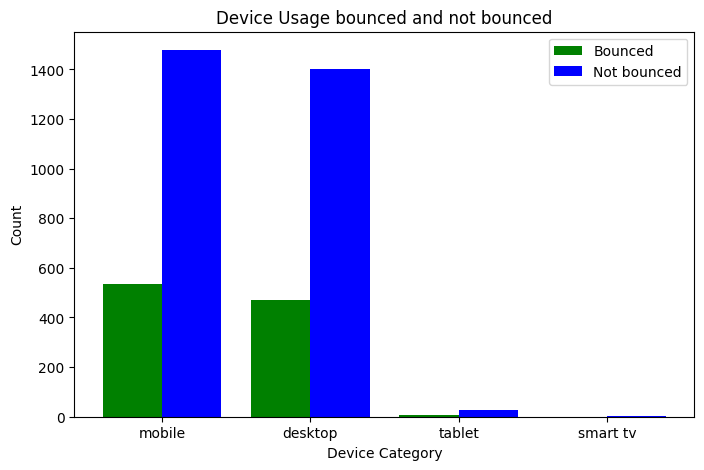

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.4
x = np.arange(len(summary_df.index))

ax.bar(x - bar_width/2, summary_df["Bounced"], bar_width, label="Bounced", color="green")
ax.bar(x + bar_width/2, summary_df["Not bounced"], bar_width, label="Not bounced", color="blue")

ax.set_xlabel("Device Category")
ax.set_ylabel("Count")
ax.set_title("Device Usage bounced and not bounced")
ax.set_xticks(x)
ax.set_xticklabels(summary_df.index)
ax.legend()
plt.show()

### Referral Source

TBD, need data

### Graph of usage over the day

To discuss: I think we would need to compare the number of sessions between all of the json files.



In [ ]:
df_sum = df.groupby('occurrence_date')['user_ltv_sessions'].count().reset_index()

look at count instead

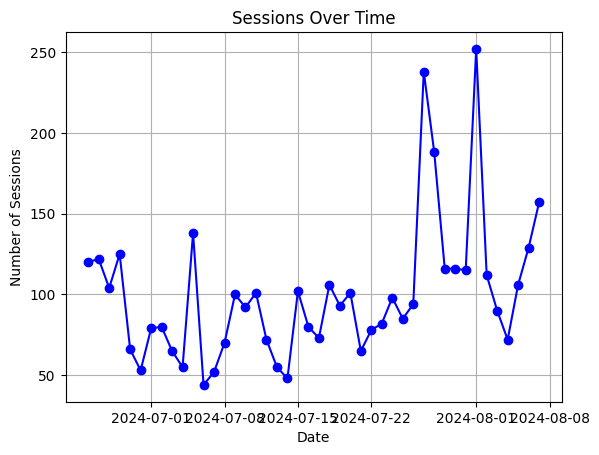

In [ ]:
# Plot the data
plt.plot(df_sum['occurrence_date'], df_sum['user_ltv_sessions'], marker='o', color='b', label='Sessions')

# Customize labels and title
plt.title('Sessions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sessions')

plt.grid(True)

### Graph of usage over the week

To discuss

## Return user vs. first-time user

### Dataframe prep

Assumption: first time user is when their first time going to the site is during the 44 day time frame. So when earliest session number is 1

And returning users have visited the site at least once before the 44 day time frame

In [ ]:
df_bounce['first_visit_date'] #use this as well

,first_visit_date
0,2023-10-03
1,2024-07-19
2,2024-08-05
3,2024-07-31
4,2024-08-06
...,...
3914,2024-06-25
3915,2024-06-25
3916,2024-06-25
3917,2024-06-25


In [ ]:
return_users = df_bounce[df_bounce['user_ltv_sessions_earliest'] != 1]
first_time_users = df_bounce[df_bounce['user_ltv_sessions_earliest'] == 1]

In [ ]:
print(f"Number of returning users: {len(return_users)}")
print(f"Number of first time users: {len(first_time_users)}")

Number of returning users: 411
Number of first time users: 3508


### Bounce Rate

In [ ]:
print(f"Lifetime bounce rate for returning users: {calc_bounce(return_users)}%")
print(f"Lifetime bounce rate for first time users: {calc_bounce(first_time_users)}%")

Lifetime bounce rate for returning users: 32.16%
Lifetime bounce rate for first time users: 29.8%


### Time Spent

Returning Users

In [ ]:
print(f"Average number of lifetime minutes for sessions: {return_users['ltv_session_duration_mins'].describe()['mean']:.2f}")
print(f"Average number of lifetime minutes for engaged sessions: {return_users['ltv_engaged_duration_mins'].describe()['mean']:.2f}")
print(f"\nMedian number of lifetime minutes for sessions: {return_users['ltv_session_duration_mins'].describe()['50%']:.2f}")
print(f"Median number of lifetime minutes for engaged sessions: {return_users['ltv_engaged_duration_mins'].describe()['50%']:.2f}")

Average number of lifetime minutes for sessions: 59.61
Average number of lifetime minutes for engaged sessions: 10.15

Median number of lifetime minutes for sessions: 3.30
Median number of lifetime minutes for engaged sessions: 1.27


First time users

In [ ]:
print(f"Average number of lifetime minutes for sessions: {first_time_users['ltv_session_duration_mins'].describe()['mean']:.2f}")
print(f"Average number of lifetime minutes for engaged sessions: {first_time_users['ltv_engaged_duration_mins'].describe()['mean']:.2f}")
print(f"\nMedian number of lifetime minutes for sessions: {first_time_users['ltv_session_duration_mins'].describe()['50%']:.2f}")
print(f"Median number of lifetime minutes for engaged sessions: {first_time_users['ltv_engaged_duration_mins'].describe()['50%']:.2f}")

Average number of lifetime minutes for sessions: 2.41
Average number of lifetime minutes for engaged sessions: 1.13

Median number of lifetime minutes for sessions: 0.47
Median number of lifetime minutes for engaged sessions: 0.30


In [ ]:
# Split data into two groups

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(return_users['ltv_session_duration_mins'], first_time_users['ltv_session_duration_mins'], alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in session time between returning users and not.")
else:
    print("No significant difference in session time between returning users and not.")

U-statistic: 1072464.5, P-value: 4.078119433631631e-59
Significant difference in session time between returning users and not.


In [ ]:
# Split data into two groups

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(return_users['ltv_engaged_duration_mins'], first_time_users['ltv_engaged_duration_mins'], alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in engaged session time between returning users and not.")
else:
    print("No significant difference in session time between returning users and not.")

U-statistic: 1001099.0, P-value: 2.2763994624943398e-38
Significant difference in engaged session time between returning users and not.


### Sessions

In [ ]:
print("Returning users:")
print(f"Average number of sessions: {return_users['user_ltv_sessions'].describe()['mean']:.2f}")
print(f"Average number of engaged: {return_users['user_ltv_engaged_sessions'].describe()['mean']:.2f}")
print(f"Median number of sessions: {return_users['user_ltv_sessions'].describe()['50%']:.2f}")
print(f"Median number of sessions: {return_users['user_ltv_engaged_sessions'].describe()['50%']:.2f}")

print("\nFirst time users:")
print(f"Average number of sessions: {first_time_users['user_ltv_sessions'].describe()['mean']:.2f}")
print(f"Average number of engaged: {first_time_users['user_ltv_engaged_sessions'].describe()['mean']:.2f}")
print(f"Median number of sessions: {first_time_users['user_ltv_sessions'].describe()['50%']:.2f}")
print(f"Median number of sessions: {first_time_users['user_ltv_engaged_sessions'].describe()['50%']:.2f}")

Returning users:
Average number of sessions: 8.00
Average number of engaged: 5.43
Median number of sessions: 2.00
Median number of sessions: 1.00

First time users:
Average number of sessions: 1.08
Average number of engaged: 0.76
Median number of sessions: 1.00
Median number of sessions: 1.00


In [ ]:
# Split data into two groups

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(return_users['user_ltv_sessions'], first_time_users['user_ltv_sessions'], alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in sessions between returning users and not.")
else:
    print("No significant difference in sessions between returning users and not.")

U-statistic: 1411131.5, P-value: 0.0
Significant difference in sessions between returning users and not.


In [ ]:
# Split data into two groups

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(return_users['user_ltv_engaged_sessions'], first_time_users['user_ltv_engaged_sessions'], alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in engaged sessions between returning users and not.")
else:
    print("No significant difference in engaged sessions between returning users and not.")

U-statistic: 1097792.5, P-value: 1.7199014126373475e-97
Significant difference in engaged sessions between returning users and not.


### RFV

In [ ]:
# Split data into two groups

# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(return_users['RFV'], first_time_users['RFV'], alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in RFV between returning users and not.")
else:
    print("No significant difference in RFV between returning users and not.")

U-statistic: nan, P-value: nan
No significant difference in RFV between returning users and not.


### Device Type

In [ ]:
summary_df = pd.concat([return_users['device_category'].value_counts(), first_time_users['device_category'].value_counts()], axis=1)
summary_df.columns = ["Returning", "First Time"]
summary_df

,Returning,First Time
device_category,,
desktop,220.0,1650
mobile,189.0,1825
tablet,2.0,32
smart tv,NaN,1


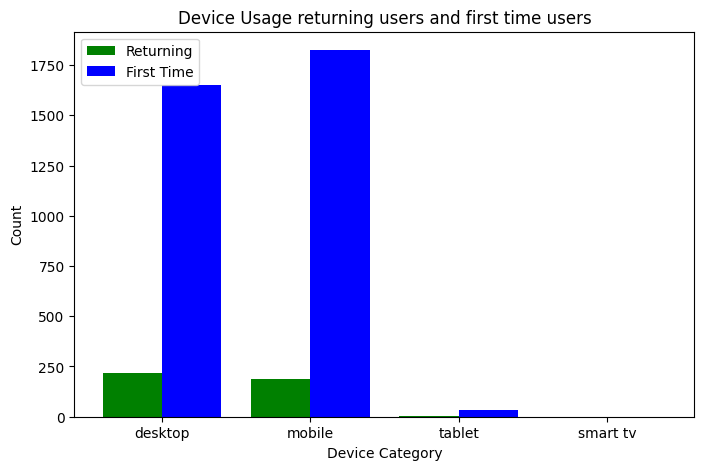

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.4
x = np.arange(len(summary_df.index))

ax.bar(x - bar_width/2, summary_df["Returning"], bar_width, label="Returning", color="green")
ax.bar(x + bar_width/2, summary_df["First Time"], bar_width, label="First Time", color="blue")

ax.set_xlabel("Device Category")
ax.set_ylabel("Count")
ax.set_title("Device Usage returning users and first time users")
ax.set_xticks(x)
ax.set_xticklabels(summary_df.index)
ax.legend()
plt.show()

## Dallas VS Non Dallas

Dataframe preparation

In [ ]:
# Split data into two groups: Dallas vs. Not Dallas
segments_dallas = df_bounce[df_bounce['city'] == 'Dallas']
segments_not_dallas = df_bounce[df_bounce['city'] != 'Dallas']

### Bounce Rate

def calc_bounce(data):

    all_sessions = data['user_ltv_sessions'].sum()

    engaged_sessions = data['user_ltv_engaged_sessions'].sum()

    return round((all_sessions - engaged_sessions)/all_sessions*100,2)

In [ ]:
sum(df_bounce['city'] =='Dallas'), len(df_bounce)
print(f"About {(sum(df_bounce['city'] =='Dallas')/len(df_bounce))*100 :.2f} % of users are from Dallas")

About 34.58 % of users are from Dallas


Lifetime bounce rate for visited at least twice users

(Users whose ```difference_sessions``` not 0)

In [ ]:
dallas_returned_bounce_rate = calc_bounce(segments_dallas[(segments_dallas['difference_sessions'] != 0)])
non_dallas_returned_bounce_rate = calc_bounce(segments_not_dallas[segments_not_dallas['difference_sessions'] != 0])
print(f"Dallas: {dallas_returned_bounce_rate}%")
print(f"Not Dallas: {non_dallas_returned_bounce_rate}%")

Dallas: 30.75%
Not Dallas: 31.49%


Lifetime bounce rate for no engaged sessions but had at least 2 sessions users

(Users whose ```difference_sessions``` =! 0 & ```difference_engaged_sessions``` == 0 & ```user_ltv_engaged_sessions_earliest``` != 0)

In [ ]:
dallas_no_engaged_but_have_2more_sessions_bounce_rate = calc_bounce(segments_dallas[(segments_dallas['difference_sessions']!=0) & (segments_dallas['difference_engaged_sessions']==0) & (segments_dallas['user_ltv_engaged_sessions_earliest'] !=0)])
not_dallas_no_engaged_but_have_2more_sessions_bounce_rate = calc_bounce(segments_not_dallas[(segments_not_dallas['difference_sessions']!=0) & (segments_not_dallas['difference_engaged_sessions']==0) & (segments_not_dallas['user_ltv_engaged_sessions_earliest'] !=0)])
print(f"Dallas: {dallas_no_engaged_but_have_2more_sessions_bounce_rate}%")
print(f"Not Dallas: {not_dallas_no_engaged_but_have_2more_sessions_bounce_rate}%")

Dallas: 55.3%
Not Dallas: 52.43%


Lifetime bounce rate for only had engaged sessions users

(Users whose ```difference_engaged_sessions``` == ```difference_sessions``` & ``` difference_sessions``` != 0)

In [ ]:
dallas_only_had_engaged_sessions_bounce_rate = calc_bounce(segments_dallas[(segments_dallas['difference_sessions']==segments_dallas['difference_engaged_sessions']) & (segments_dallas['difference_sessions']!=0)])
not_dallas_only_had_engaged_sessions_bounce_rate = calc_bounce(segments_not_dallas[(segments_not_dallas['difference_sessions']==segments_not_dallas['difference_engaged_sessions']) & (segments_not_dallas['difference_sessions']!=0)])
print(f"Dallas: {dallas_only_had_engaged_sessions_bounce_rate}%")
print(f"Not Dallas: {not_dallas_only_had_engaged_sessions_bounce_rate}%")

Dallas: 10.24%
Not Dallas: 20.77%


### Return rate

DataFrame Preparation

Return rate means the percentage of users who revisit the site after their initial visit within a given time period.

(sum(```difference_sessions``` ) / sum(```user_ltv_sessions_earliest```))

In [ ]:
print(f"Return rate for users in Dallas: {(sum(segments_dallas['difference_sessions']) / sum(segments_dallas['user_ltv_engaged_sessions_earliest'])) *100 :.2f}%")
print(f"Return rate for users not in Dallas: {(sum(segments_not_dallas['difference_sessions']) / sum(segments_not_dallas['user_ltv_engaged_sessions_earliest'])) *100 :.2f}%")

Return rate for users in Dallas: 11.40%
Return rate for users not in Dallas: 15.59%


### Time Spent

```user_ltv_engagement_time_millis``` represent the lifetime total engagement time (in milliseconds).

```user_ltv_session_duration_micros``` represent the lifetime total session duration (in microseconds).

In [ ]:
# Create two series contain the engagement time in minutes for Dallas and Non Dallas.
dallas_engagement_time_spend_minute = segments_dallas['user_ltv_engagement_time_millis']/6000
non_dallas_engagement_time_spend_minute = segments_not_dallas['user_ltv_engagement_time_millis']/6000

In [ ]:
summary_df = pd.concat([dallas_engagement_time_spend_minute.describe(), non_dallas_engagement_time_spend_minute.describe()], axis=1)
summary_df.columns = ["Dallas", "Non-Dallas"]
summary_df

,Dallas,Non-Dallas
count,1100.000000,2094.000000
mean,28.535588,23.864496
std,176.199731,193.129653
min,0.001833,0.003000
25%,2.325042,1.841583
50%,6.261750,5.057583
75%,17.300750,15.001875
max,3638.789333,7995.754333


Dallas users spend significantly more time interacting with the site on average.

Dallas users have lower variability, which means their engagement times can be more consistent.



In [ ]:
# Create two series contain the lifetime total session duration in minutes for Dallas and Non Dallas.
dallas_time_spend_minute = segments_dallas['user_ltv_session_duration_micros']/60000000
non_dallas_time_spend_minute = segments_not_dallas['user_ltv_session_duration_micros']/60000000

KeyError: 'user_ltv_session_duration_micros'

In [ ]:
summary_df = pd.concat([dallas_time_spend_minute.describe(), non_dallas_time_spend_minute.describe()], axis=1)
summary_df.columns = ["Dallas", "Non-Dallas"]
summary_df

Total time spent for users in Dallas are higher than users not in Dallas on average

Both groups show high variability, meaning some users spend much more time than others

### Sessions

Analysis of ```user_ltv_sessions```

In [ ]:
dallas_sessions = segments_dallas['user_ltv_sessions'].describe()
not_dallas_sessions = segments_not_dallas['user_ltv_sessions'].describe()
summary_df = pd.concat([dallas_sessions, not_dallas_sessions], axis=1)
summary_df.columns = ["Dallas", "Non-Dallas"]
summary_df

Dallas users have an average of 2.03 sessions, while Non-Dallas users have 1.68 sessions.

This indicates Dallas users visit the site more frequently.

Most users in both groups only have 1 session. This suggests that a majority of users are one-time visitors



Analysis of ```user_ltv_engaged_sessions```

In [ ]:
dallas_engaged_sessions = segments_dallas['user_ltv_engaged_sessions'].describe()
not_dallas_engaged_sessions = segments_not_dallas['user_ltv_engaged_sessions'].describe()
summary_df = pd.concat([dallas_engaged_sessions, not_dallas_engaged_sessions], axis=1)
summary_df.columns = ["Dallas", "Non-Dallas"]
summary_df

Dallas users have slightly more engaged sessions on average than Non-Dallas users.

However, the mean is still close to 1, meaning most users are not highly engaged.

Some users have hundreds of sessions in both groups, which are outliers in the data

### RFV

In [ ]:
summary_df = pd.concat([segments_dallas['RFV'].describe(), segments_not_dallas['RFV'].describe()], axis=1)
summary_df.columns = ["Dallas", "Non-Dallas"]
summary_df

In [ ]:
sns.histplot(segments_dallas['RFV'], label="Dallas", color="blue", alpha=0.6)
sns.histplot(segments_not_dallas['RFV'], label="Non-Dallas", color="pink", alpha=0.6)
plt.legend()
plt.title("Distribution of RFV Values: Dallas vs Non-Dallas")
plt.show()

Majority users in Dallas or not in Dallas have low RFV scores, this suggests that most users are not frequently returning. This is align with result we derived in return rate part, which is also shows few users returned in both groups.

For the RFV part, we did a U test

In [ ]:
# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(segments_dallas['RFV'], segments_not_dallas['RFV'], alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in RFV between Dallas and non-Dallas users.")
else:
    print("No significant difference in RFV between Dallas and non-Dallas users.")

Therefore, we concluded that location do not strongly influence RFV values.

### Device Type

In [ ]:
summary_df = pd.concat([segments_dallas['device_category'].value_counts(), segments_not_dallas['device_category'].value_counts()], axis=1)
summary_df.columns = ["Dallas", "Non-Dallas"]
summary_df

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.4
x = np.arange(len(summary_df.index))

ax.bar(x - bar_width/2, summary_df["Dallas"], bar_width, label="Dallas", color="pink")
ax.bar(x + bar_width/2, summary_df["Non-Dallas"], bar_width, label="Non-Dallas", color="blue")

ax.set_xlabel("Device Category")
ax.set_ylabel("Count")
ax.set_title("Device Usage in Dallas vs. Non-Dallas")
ax.set_xticks(x)
ax.set_xticklabels(summary_df.index)
ax.legend()
plt.show()

In both Dallas and non-Dallas data, mobile is the most common device used. This is normal since mobile usage is more prevalent due to convenience

There is a significant difference in Desktop usage between two groups, combine the results above that the bounce rate for Dallas is significantly lower than for non-Dallas. This suggest that desktop (device category) may play a role in influencing bounce rate or other statistics, we will analysis this in later device category part.



### Referral source

This part, we do not have relavent data yet, so we jumped this part now. We can back to this part until we have the data



### Graph of usage over the day

### Graph of usage over the week

## Device Type

Dataframe preparation

In [ ]:
df_bounce['device_category'].value_counts()

In [ ]:
# Split data into three groups: mobile vs desktop vs tablet
segments_mobile = df_bounce[df_bounce['device_category'] == 'mobile']
segments_desktop = df_bounce[df_bounce['device_category'] == 'desktop']
segments_tablet = df_bounce[df_bounce['device_category'] == 'tablet']

### Bounce Rate

Lifetime bounce rate for visited at least twice users

(Users whose difference_sessions not 0)

In [ ]:
print(f"mobile: {calc_bounce(segments_mobile[segments_mobile['difference_sessions'] != 0])}%")
print(f"Desktop: {calc_bounce(segments_desktop[segments_desktop['difference_sessions'] != 0])}%")
print(f"Tablet: {calc_bounce(segments_tablet[segments_tablet['difference_sessions'] != 0])}%")

Mobile has the highest bounce rate, and tablet has the lowest rate since there is only one users using tablet and visited at least twice

In [ ]:
segments_tablet[segments_tablet['difference_sessions'] != 0][['user_ltv_sessions', 'user_ltv_engaged_sessions']]

Lifetime bounce rate for no engaged sessions but had at least 2 sessions users

(Users whose difference_sessions =! 0 & difference_engaged_sessions == 0 & user_ltv_engaged_sessions_earliest != 0)

In [ ]:
print(f"mobile: {calc_bounce(segments_mobile[(segments_mobile['difference_sessions']!=0) & (segments_mobile['difference_engaged_sessions']==0) & (segments_mobile['user_ltv_engaged_sessions_earliest'] !=0)])}%")
print(f"Desktop: {calc_bounce(segments_desktop[(segments_desktop['difference_sessions']!=0) & (segments_desktop['difference_engaged_sessions']==0) & (segments_desktop['user_ltv_engaged_sessions_earliest'] !=0)])}%")
print(f"tablet: {calc_bounce(segments_tablet[(segments_tablet['difference_sessions']!=0) & (segments_tablet['difference_engaged_sessions']==0) & (segments_tablet['user_ltv_engaged_sessions_earliest'] !=0)])}%")

The result is similar as above which is mobile group has the highest bounce rate.

But bounce rate for all groups are higher than above

In [ ]:
len(segments_tablet[(segments_tablet['difference_sessions']!=0) & (segments_tablet['difference_engaged_sessions']==0) & (segments_tablet['user_ltv_engaged_sessions_earliest'] !=0)])

We got nan bounce rate for tablet group, since there is no user in this group has no engaged sessions but had at least 2 sessions

Lifetime bounce rate for only had engaged sessions users

(Users whose difference_engaged_sessions == difference_sessions & difference_sessions != 0)

In [ ]:
print(f" mobile: {calc_bounce(segments_mobile[(segments_mobile['difference_sessions']==segments_mobile['difference_engaged_sessions']) & (segments_mobile['difference_sessions']!=0)])}%")
print(f" desktop: {calc_bounce(segments_desktop[(segments_desktop['difference_sessions']==segments_desktop['difference_engaged_sessions']) & (segments_desktop['difference_sessions']!=0)])}%")
print(f" tablet: {calc_bounce(segments_tablet[(segments_tablet['difference_sessions']==segments_tablet['difference_engaged_sessions']) & (segments_tablet['difference_sessions']!=0)])}%")

In this case, desktop group has the highest bounce rate and tablet is still having lowest bounce rate

In [ ]:
segments_tablet[(segments_tablet['difference_sessions']==segments_tablet['difference_engaged_sessions']) & (segments_tablet['difference_sessions']!=0)][['user_ltv_sessions', 'user_ltv_engaged_sessions']]

Tablet group has the highest bounce rate and mobile has the lowest bounce rate

### Return Rate

In [ ]:
print(f"Return rate for users using mobile: {(sum(segments_mobile['difference_sessions']) / sum(segments_mobile['user_ltv_engaged_sessions_earliest'])) *100 :.2f}%")
print(f"Return rate for users using desktop: {(sum(segments_desktop['difference_sessions']) / sum(segments_desktop['user_ltv_engaged_sessions_earliest'])) *100 :.2f}%")
print(f"Return rate for users using tablet: {(sum(segments_tablet['difference_sessions']) / sum(segments_tablet['user_ltv_engaged_sessions_earliest'])) *100 :.2f}%")

### Time Spent

Data Preparation

In [ ]:
summary_df = pd.concat([segments_mobile['ltv_engaged_duration_mins'].describe(), segments_desktop['ltv_engaged_duration_mins'].describe(),segments_tablet['ltv_engaged_duration_mins'].describe()], axis=1)
summary_df.columns = ["mobile", "desktop", "tablet"]
summary_df

Desktop users spend the most time, with an average of 3.3 minutes, while Mobile users spend significantly less time on average (around 1 minutes).

The standard deviation for Desktop is extremely high, indicates that there is huge variability in time spent, possibly due to outliers.

In [ ]:
summary_df = pd.concat([segments_mobile['ltv_session_duration_mins'].describe(), segments_desktop['ltv_session_duration_mins'].describe(),segments_tablet['ltv_session_duration_mins'].describe()], axis=1)
summary_df.columns = ["mobile", "desktop", "tablet"]
summary_df

The result is identical from enagement time, Desktop users spend significantly more time on average compared to Mobile and Tablet users.

### Sessions

Analysis of ```user_ltv_sessions```

In [ ]:
summary_df = pd.concat([segments_mobile['user_ltv_sessions'].describe(), segments_desktop['user_ltv_sessions'].describe(),segments_tablet['user_ltv_sessions'].describe()], axis=1)
summary_df.columns = ["Mobile", "Desktop", "Tablet"]
summary_df

Desktop users are the most engaged, but the high variance suggests a mix of casual and very frequent users.

Mobile dominates in user count but has low average sessions, imply that users may visit the site quickly and leave.

Analysis of ```user_ltv_engaged_sessions```

In [ ]:
summary_df = pd.concat([segments_mobile['user_ltv_engaged_sessions'].describe(), segments_desktop['user_ltv_engaged_sessions'].describe(),segments_tablet['user_ltv_engaged_sessions'].describe()], axis=1)
summary_df.columns = ["Mobile", "Desktop", "Tablet"]
summary_df

Same result as above, desktop users engaged the most

### RFV

In [ ]:
summary_df = pd.concat([segments_mobile['RFV'].describe(), segments_desktop['RFV'].describe(),segments_tablet['RFV'].describe() ], axis=1)
summary_df.columns = ["Mobile", "Desktop", "Tablet"]
summary_df

The mean RFV values are very low across all devices.

The median (50%) and upper quartile (75%) RFV values are both 0, meaning that the majority of users have little to no recurring activity.

In [ ]:
sns.histplot(segments_mobile['RFV'], label="mobile", color="blue", alpha=0.6)
sns.histplot(segments_desktop['RFV'], label="desktop", color="pink", alpha=0.6)
sns.histplot(segments_tablet['RFV'], label="tablet", color="black", alpha=0.6)
plt.legend()
plt.title("Distribution of RFV Values: Device Type")
plt.show()

In [ ]:
# Perform Mann-Whitney U Test
u_stat, p_value = stats.mannwhitneyu(segments_mobile['RFV'], segments_desktop['RFV'], alternative='two-sided')

print(f"U-statistic: {u_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in RFV by using different devices.")
else:
    print("No significant difference in RFV by using different devices.")

### Referral source
This part, we do not have relavent data yet, so we jumped this part now. We can back to this part until we have the data

### Graph of usage over the day

### Graph of usage over the week